##### Temperature Forecast Project using ML

##### Project Description

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

##### Attribute Information:
For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.

Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Temperature%20Forecast/temperature.csv


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('temperature.csv')

In [3]:
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [4]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
pd.set_option('display.max_columns', None) 
df.head()

No of Rows: 7752
No of Columns: 25


station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  
0       21.2  
1       22.5  
2       23.9  
3       24.3  
4       22.5

In [5]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

# Statistical Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


##### All the columns are Numerical in Nature.

In [7]:
print(df.duplicated().sum())

0


#### Checking Missing Values

In [8]:
missing_values=df.isnull().sum().sort_values(ascending=False)
percentage=(missing_values/len(df))*100
print(pd.concat([missing_values,percentage],axis=1,keys=['Missing values','percentage' ]))

                  Missing values  percentage
LDAPS_RHmin                   75    0.967492
LDAPS_WS                      75    0.967492
LDAPS_Tmin_lapse              75    0.967492
LDAPS_Tmax_lapse              75    0.967492
LDAPS_RHmax                   75    0.967492
LDAPS_CC3                     75    0.967492
LDAPS_CC2                     75    0.967492
LDAPS_CC1                     75    0.967492
LDAPS_LH                      75    0.967492
LDAPS_PPT4                    75    0.967492
LDAPS_PPT1                    75    0.967492
LDAPS_PPT2                    75    0.967492
LDAPS_PPT3                    75    0.967492
LDAPS_CC4                     75    0.967492
Present_Tmin                  70    0.902993
Present_Tmax                  70    0.902993
Next_Tmin                     27    0.348297
Next_Tmax                     27    0.348297
station                        2    0.025800
Date                           2    0.025800
lat                            0    0.000000
DEM       

##### Missing values are less than  1% so we'll drop them directly.

In [9]:
df.dropna(inplace=True)

In [10]:
print("We have",df.shape[0] ," Rows and ",df.shape[1]  , " Columns after dropping null values.")

We have 7588  Rows and  25  Columns after dropping null values.


In [11]:
# Splitting date into day , month ,year
df['Date']=pd.to_datetime(df['Date'])

In [12]:
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)

In [13]:
df.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
Day                          int64
Month                        int64
Year                         int64
dtype: object

In [14]:
import reverse_geocoder as rg
import pprint

In [15]:
geodata=[]
def reverse_geocoordinates(coordinates):
    result = rg.search(coordinates)
    return (result)
if __name__=="__main__":
    coordinates = list(zip(df['lat'], df['lon']))
    data = reverse_geocoordinates(coordinates)
    geodata.append(data)

geo_names = pd.DataFrame(geodata).transpose()

Loading formatted geocoded file...


In [16]:
df['State']= geo_names[0].apply(lambda x:x.get('admin1'))
df['City']=geo_names[0].apply(lambda x:x.get('name'))

In [17]:
df.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  Day  Month  Year        State     City  
0       21.2   30      6  2013        Seoul    Seoul  
1       22.5   30      6  2013        Seoul    Seoul  
2       23.9   30      6  2013        Seoul    Seoul  
3       24.3   30      6  2013        Seoul    Seoul  
4       22.5   30      6  2013  Gyeonggi-do  Guri-si

# EDA

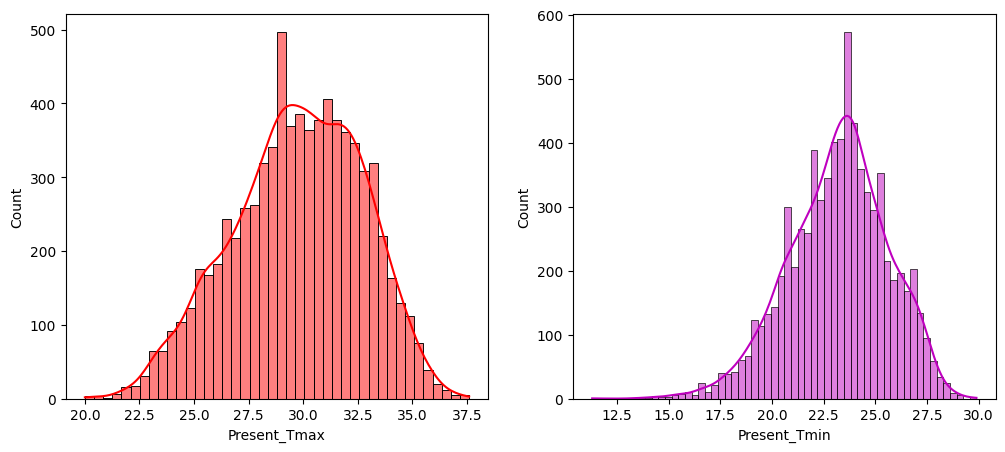

In [18]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Present_Tmax'],kde=True,color='r')
plt.subplot(1,2,2)
sns.histplot(df['Present_Tmin'],kde=True,color='m')
plt.show()

- For majority of reading Present Temperature Maximum varies in between 27.5 to 32.5 degree.
- For majority of reading Present Temperature Minimum varies in between 22.5 to 26 degree.


In [19]:
print('Present Maximum Temperature Maxima in year 2013-2016 :',df.Present_Tmax.max())
print('Present Maximum Temperature Minima in year 2013-2016 :',df.Present_Tmax.min())
print(' Average Present Maximum Temperature in year 2013-2016 :',df.Present_Tmax.mean())
print('='*100)
print('Present Minimum Temperature Maxima in year 2013-2016 :',df.Present_Tmin.max())
print('Present Minimum Temperature Minima in year 2013-2016 :',df.Present_Tmin.min())
print('Average Present Minimum Temperature in year 2013-2016 :',df.Present_Tmin.mean())

Present Maximum Temperature Maxima in year 2013-2016 : 37.6
Present Maximum Temperature Minima in year 2013-2016 : 20.0
 Average Present Maximum Temperature in year 2013-2016 : 29.748365840801263
Present Minimum Temperature Maxima in year 2013-2016 : 29.9
Present Minimum Temperature Minima in year 2013-2016 : 11.3
Average Present Minimum Temperature in year 2013-2016 : 23.195809172377437


In [20]:
pd.set_option('display.max_columns', None)
df.loc[df.Present_Tmax==df.Present_Tmax.max()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
5717     18.0 2016-08-11          37.6          26.8    44.254253   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
5717    87.745514         34.794021         27.150764  6.366598  111.225118   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
5717   0.218892   0.094288   0.004283   0.000343         0.0         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM   Slope  \
5717         0.0         0.0  37.4832  127.024  56.4448  1.2313   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year        State  \
5717      5082.563477       37.0       27.8   11      8  2016  Gyeonggi-do   

            City  
5717  Bucheon-si

In [21]:
df.loc[df.Present_Tmax==df.Present_Tmax.min()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7725      1.0 2017-08-30          20.0          15.1    35.652172   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
7725     89.97319         24.323737         16.128899  7.087329  108.981108   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
7725   0.046182   0.014955        0.0    0.00063         0.0         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM  Slope  \
7725         0.0         0.0  37.6046  126.991  212.335  2.785   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year State City  
7725       4614.76123       23.8       15.1   30      8  2017   NaN  NaN

In [22]:
df.loc[df.Present_Tmin==df.Present_Tmin.max()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
2397     23.0 2014-08-02          35.3          29.9    53.946949   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
2397    85.985161         30.912804         25.439537  13.011129  117.837212   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
2397   0.684685   0.448827   0.762858   0.635728    1.670126    0.005681   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM   Slope  \
2397    0.248885    0.003176  37.5372  126.891  15.5876  0.1554   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year        State  \
2397      5360.226563       31.3       24.8    2      8  2014  Gyeonggi-do   

         City  
2397  Guri-si

In [23]:
df.loc[df.Present_Tmin==df.Present_Tmin.min()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
6116     17.0 2016-08-27          27.1          11.3    62.793823   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  \
6116    91.726936         23.529546         17.963487  7.984566  84.48145   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
6116   0.668264   0.410536   0.452879   0.627238    0.181458         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM  Slope  \
6116    0.405181    1.015573  37.6181  127.099  53.4712  0.697   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year  State   City  
6116      4539.616699       24.6       17.1   27      8  2016  Seoul  Seoul

#### Observation:
- Present Maximum Temperature <u> Maxima </u>over four year span recorded at station 18 on 2016-11-08 with Temp of 37.6 degree. Station 18 Located at Bucheon-si city of Gyeonggido state.
- Present Maximum Temperature <u> Minima </u> over four year span recorded at station 1 on 2017-08-30 with Temp of 20 degree.
- Present Maximum Temperature <u> Maxima </u> over  four year span recorded at station 23 on 2014-02-08 with Temp of 29.9 degree. The station 23 is located in Gurisi of Gyeonggido state
- Present Maximum Temperature <u> Minima </u> over four year span recorded at station 17 on 2016-08-27 with Temp of 11.3 degree. The station 17 is located in seoul city.
- We get high value of solar radiation of high temperature day and Low radiation values at low temperature day.
- Maximum Humidity occur when global temeperature minima occur. <b> This might implies that humidity and temperature are inversely related.We will try to verify this. </b>
- Solar radiation has naturally going to have effect on wind speed,precipitation and humidity.

### Let Visualise & gain insight over this by plotting line plot over all station.

<b> Line Plot of Present Temperature Maximum over each Station </b>

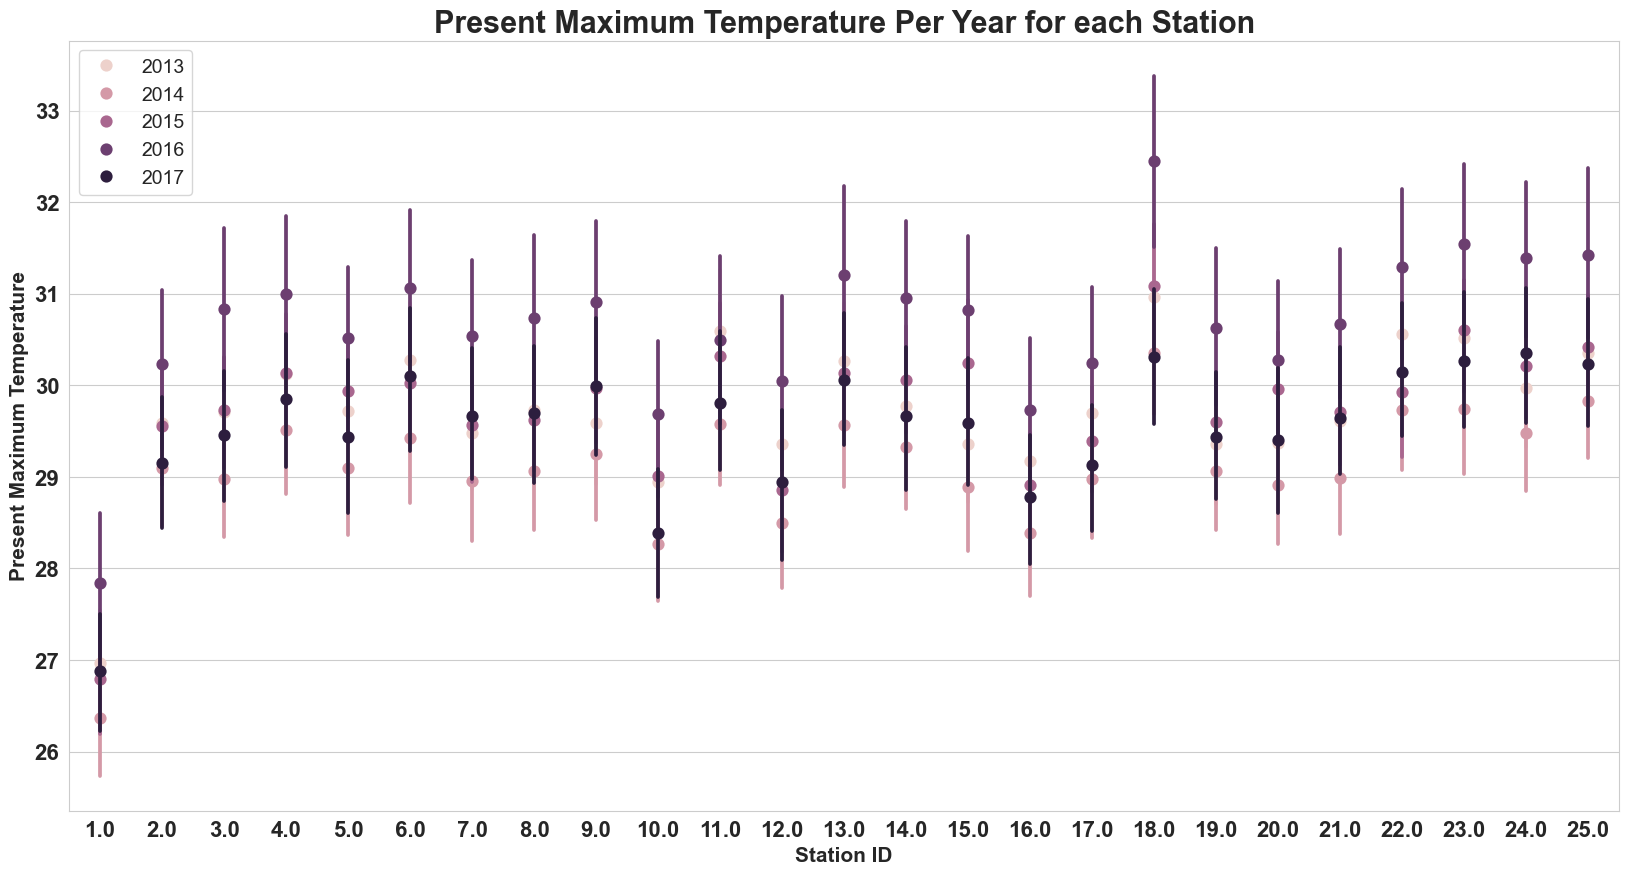

In [24]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.pointplot(x='station', y='Present_Tmax', data=df, hue='Year',join=False)
plt.title('Present Maximum Temperature Per Year for each Station', fontsize=22, fontweight='bold')
plt.xlabel('Station ID',{'fontsize':15,'fontweight' :'bold'})
plt.ylabel('Present Maximum Temperature',{'fontsize':15,'fontweight' :'bold'})
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=14)

- Over all four year higher temperature recorded at station 18 in compare to rest.
- Station 1 is coolest station over all timeframe.
- We can see 2016 is hottest year and 2014 is coolest year. It will be interesting to explore these two year independently.
- Year 2017 is much cooler compare to Year 2016. Precious relife to people in 2017 !!!

#### Line Plot of Present Temperature Minimum over each Station 

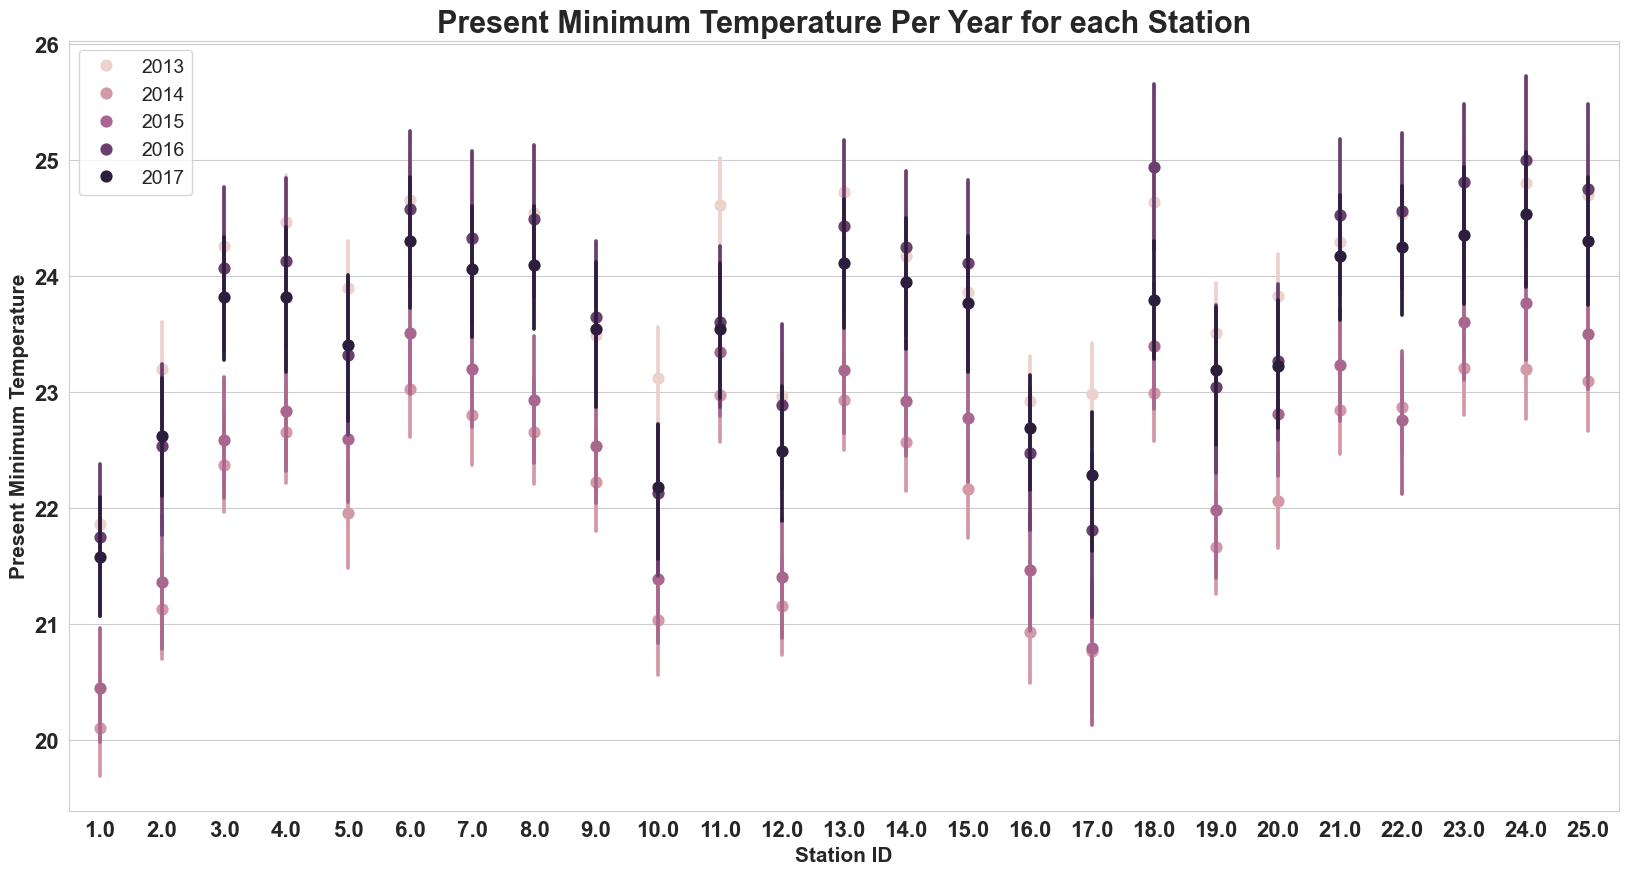

In [25]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.pointplot(x='station', y='Present_Tmin', data=df, hue='Year',join=False)
plt.title('Present Minimum Temperature Per Year for each Station', fontsize=22, fontweight='bold')
plt.xlabel('Station ID',{'fontsize':15,'fontweight' :'bold'})
plt.ylabel('Present Minimum Temperature',{'fontsize':15,'fontweight' :'bold'})
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=14)

- Year 2014 is coolest year of all time frame.
- Highest Present Minimum Temperature recorded at Station 24 inspite of Not having Highest Present Maximum Temperature. <b>This is implies that over day period minimum temperature drop recorded at station 24.</b>
- Station 1 is coolest station of all time followed by station 17. Must be tourist spot in Summer.

<Axes: xlabel='Month', ylabel='Solar radiation'>

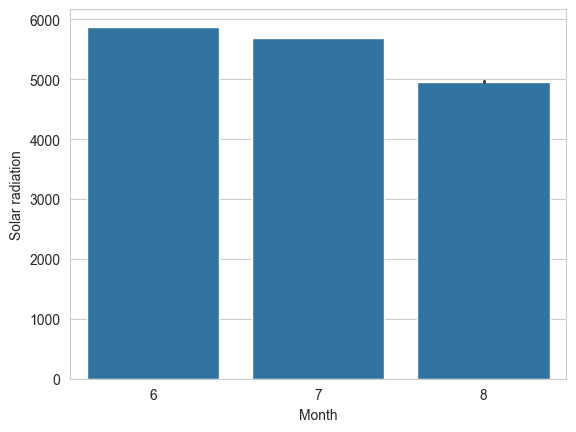

In [26]:
sns.barplot(x=df['Month'], y=df['Solar radiation'])

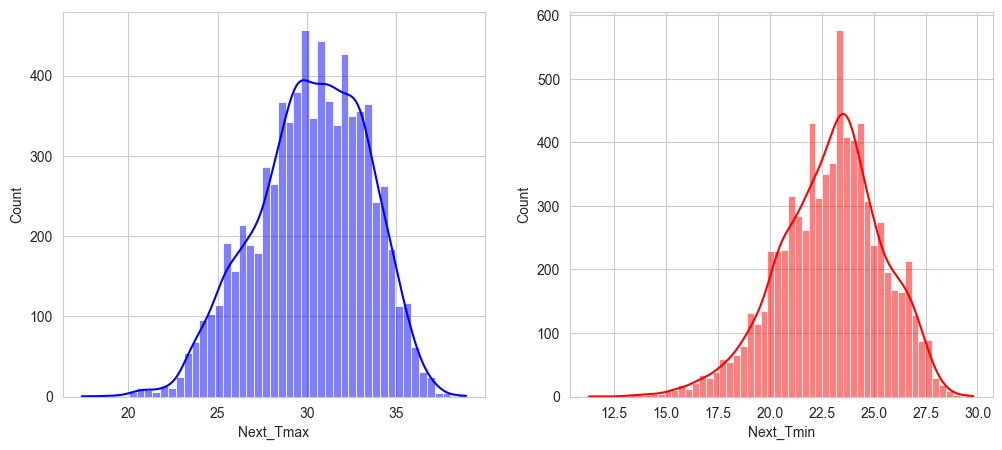

In [27]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Next_Tmax'],kde=True,color='b')
plt.subplot(1,2,2)
sns.histplot(df['Next_Tmin'],kde=True,color='r')
plt.show()

- For majority of reading Next Temperature Maximum varies in between 27.5 to 32.5 degree.
- For majority of reading Next Temperature Minimum varies in between 22.5 to 26 degree.

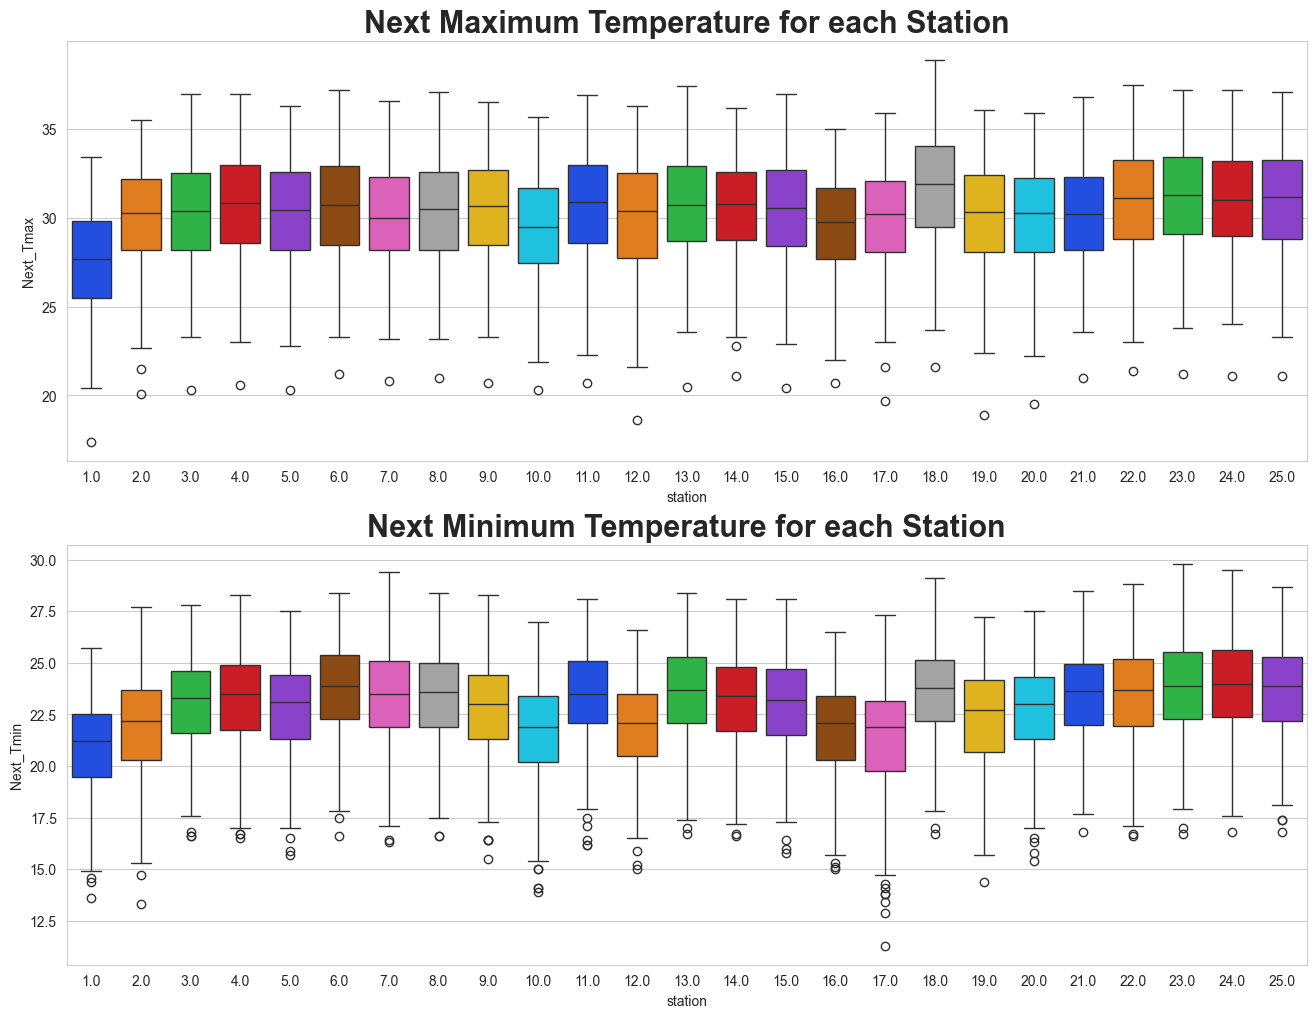

In [28]:
# Visualizing the realtion between station and target variables
plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
sns.boxplot(x=df['station'],y=df['Next_Tmax'],data=df,palette="bright")
plt.title('Next Maximum Temperature for each Station', fontsize=22, fontweight='bold')
plt.subplot(2,1,2)
sns.boxplot(x=df['station'],y=df['Next_Tmin'],data=df,palette="bright")
plt.title('Next Minimum Temperature for each Station', fontsize=22, fontweight='bold')
plt.show()

- we can notice the station 18 has highest temperature collection for both Next_Tmax and Next_Tmin targets.
- Maximum temperature difference at same station occur in station 17.

### Next Maximum Temperature Vs Cloud cover

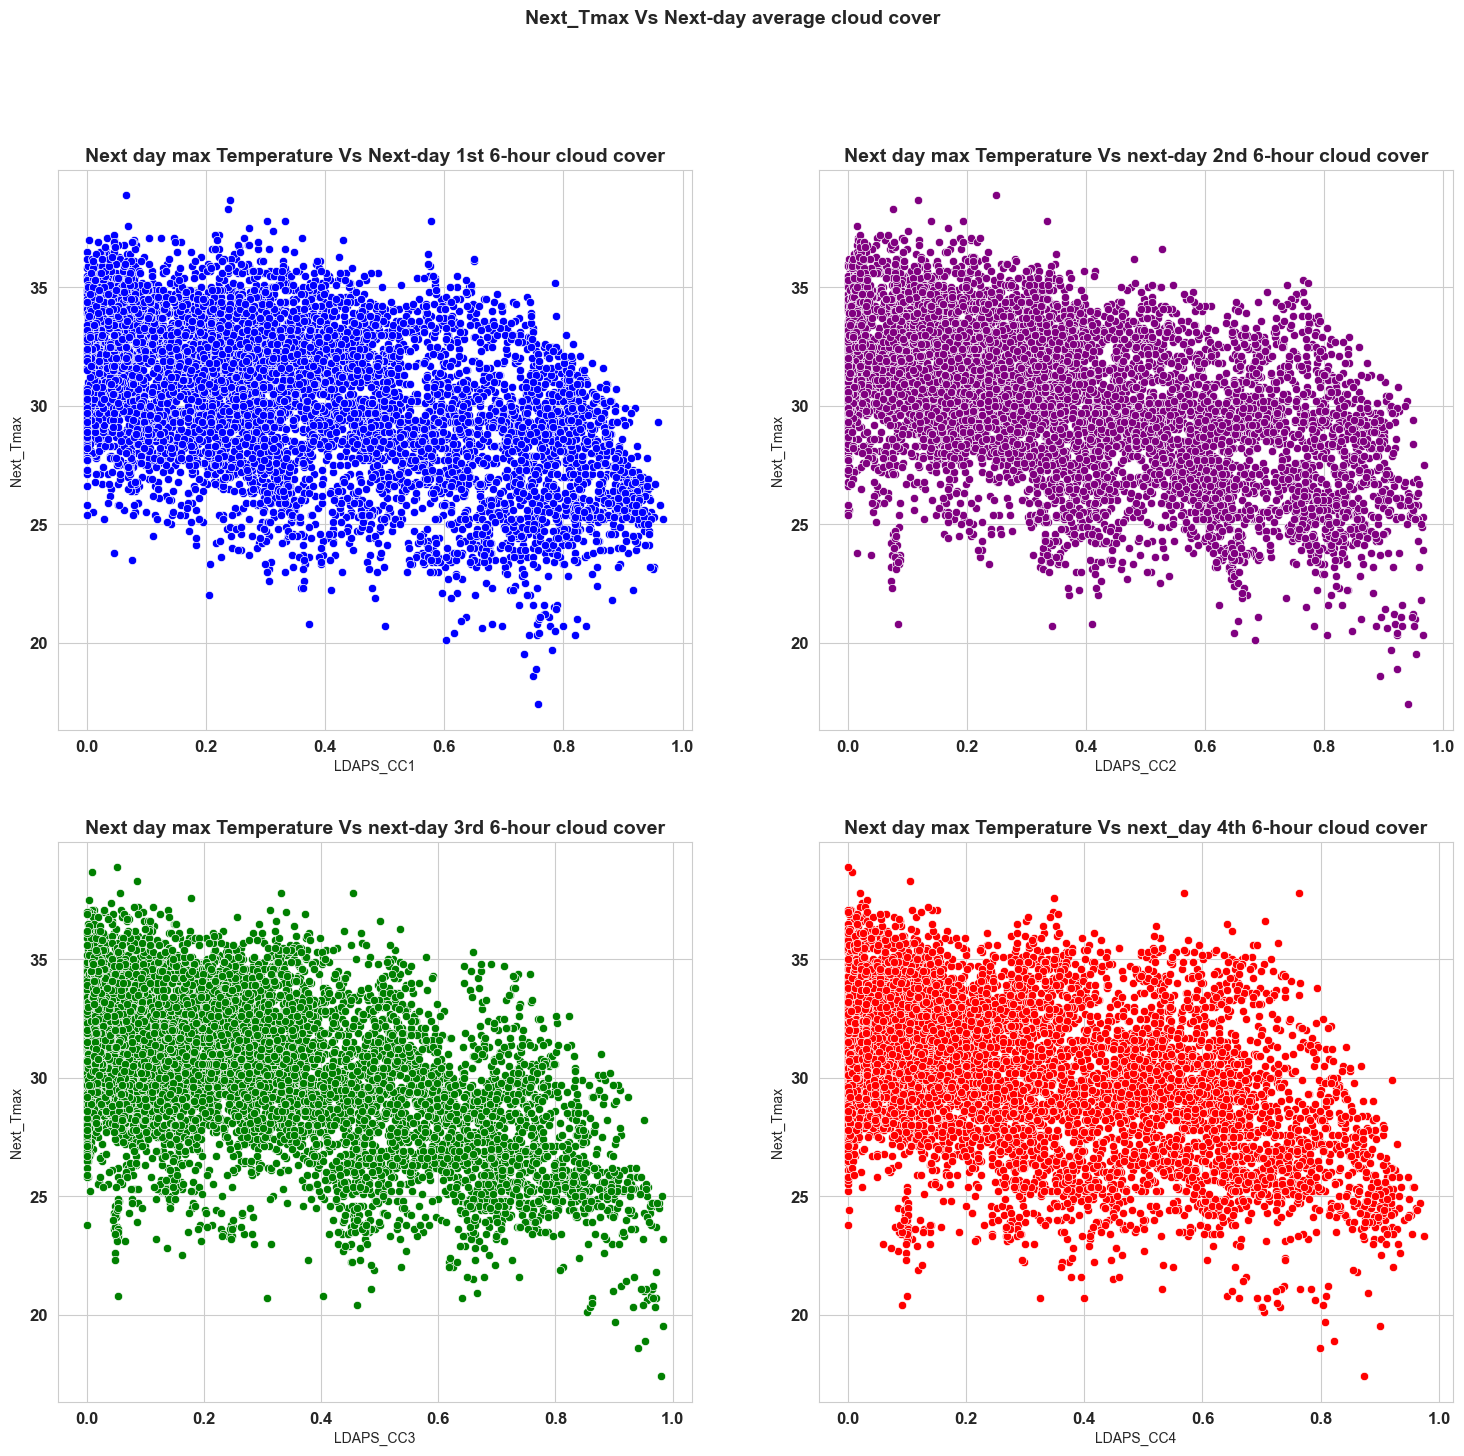

In [29]:
plt.figure(figsize=(18,16))
plt.suptitle('Next_Tmax Vs Next-day average cloud cover',fontsize=14, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next day max Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmax',data=df,color="blue")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next day max Temperature Vs next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmax',data=df,color='purple')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next day max Temperature Vs next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmax',data=df,color='green')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next day max Temperature Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmax',data=df,color="red")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

### Comparing Next day minimum temperature and next day average cloud cover

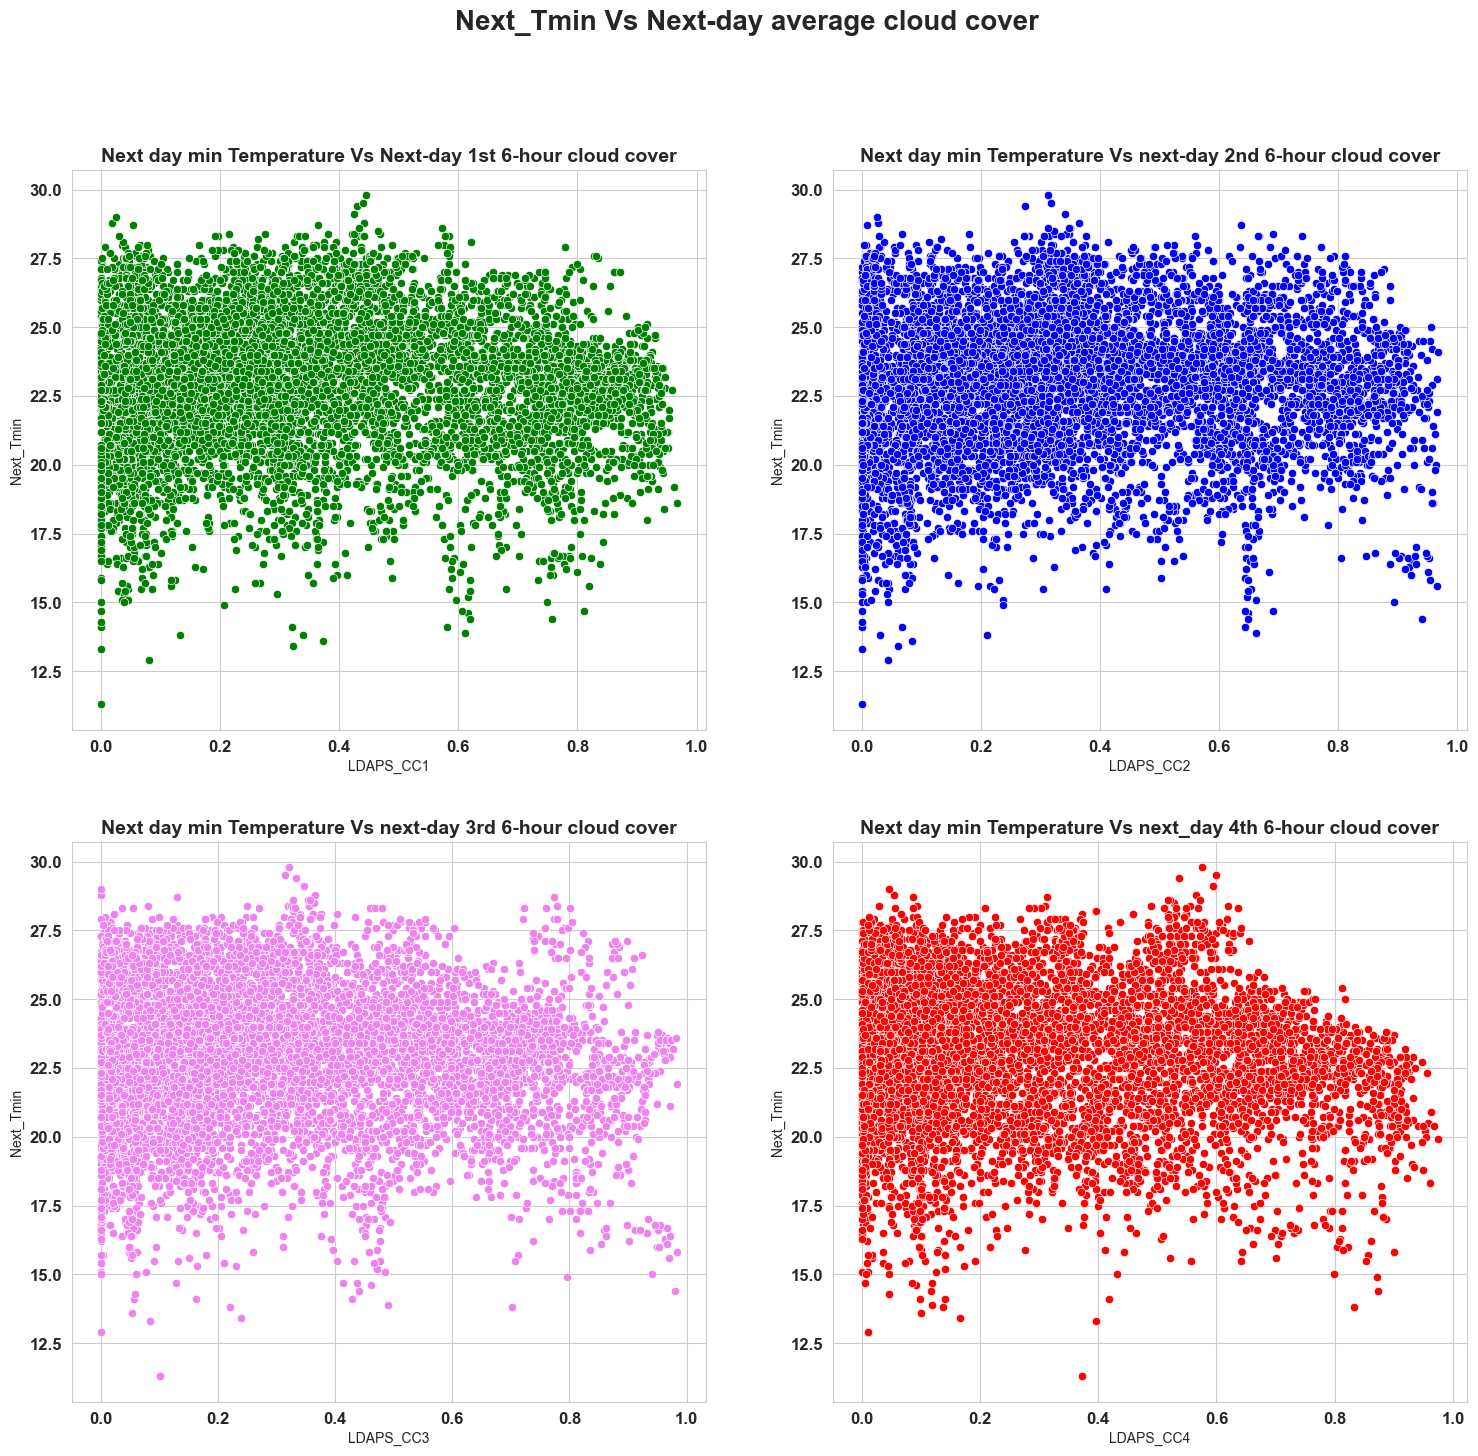

In [30]:
plt.figure(figsize=(18,16))
plt.suptitle('Next_Tmin Vs Next-day average cloud cover',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next day min Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmin',data=df,color="g")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next day min Temperature Vs next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmin',data=df,color='b')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next day min Temperature Vs next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmin',data=df,color='violet')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next day min Temperature Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmin',data=df,color="r")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()


- No significant relation between Next_Tmin and cloud cover in scatterplot. 
- We can say that Next_Tmin remains unaffected by cloud cover.

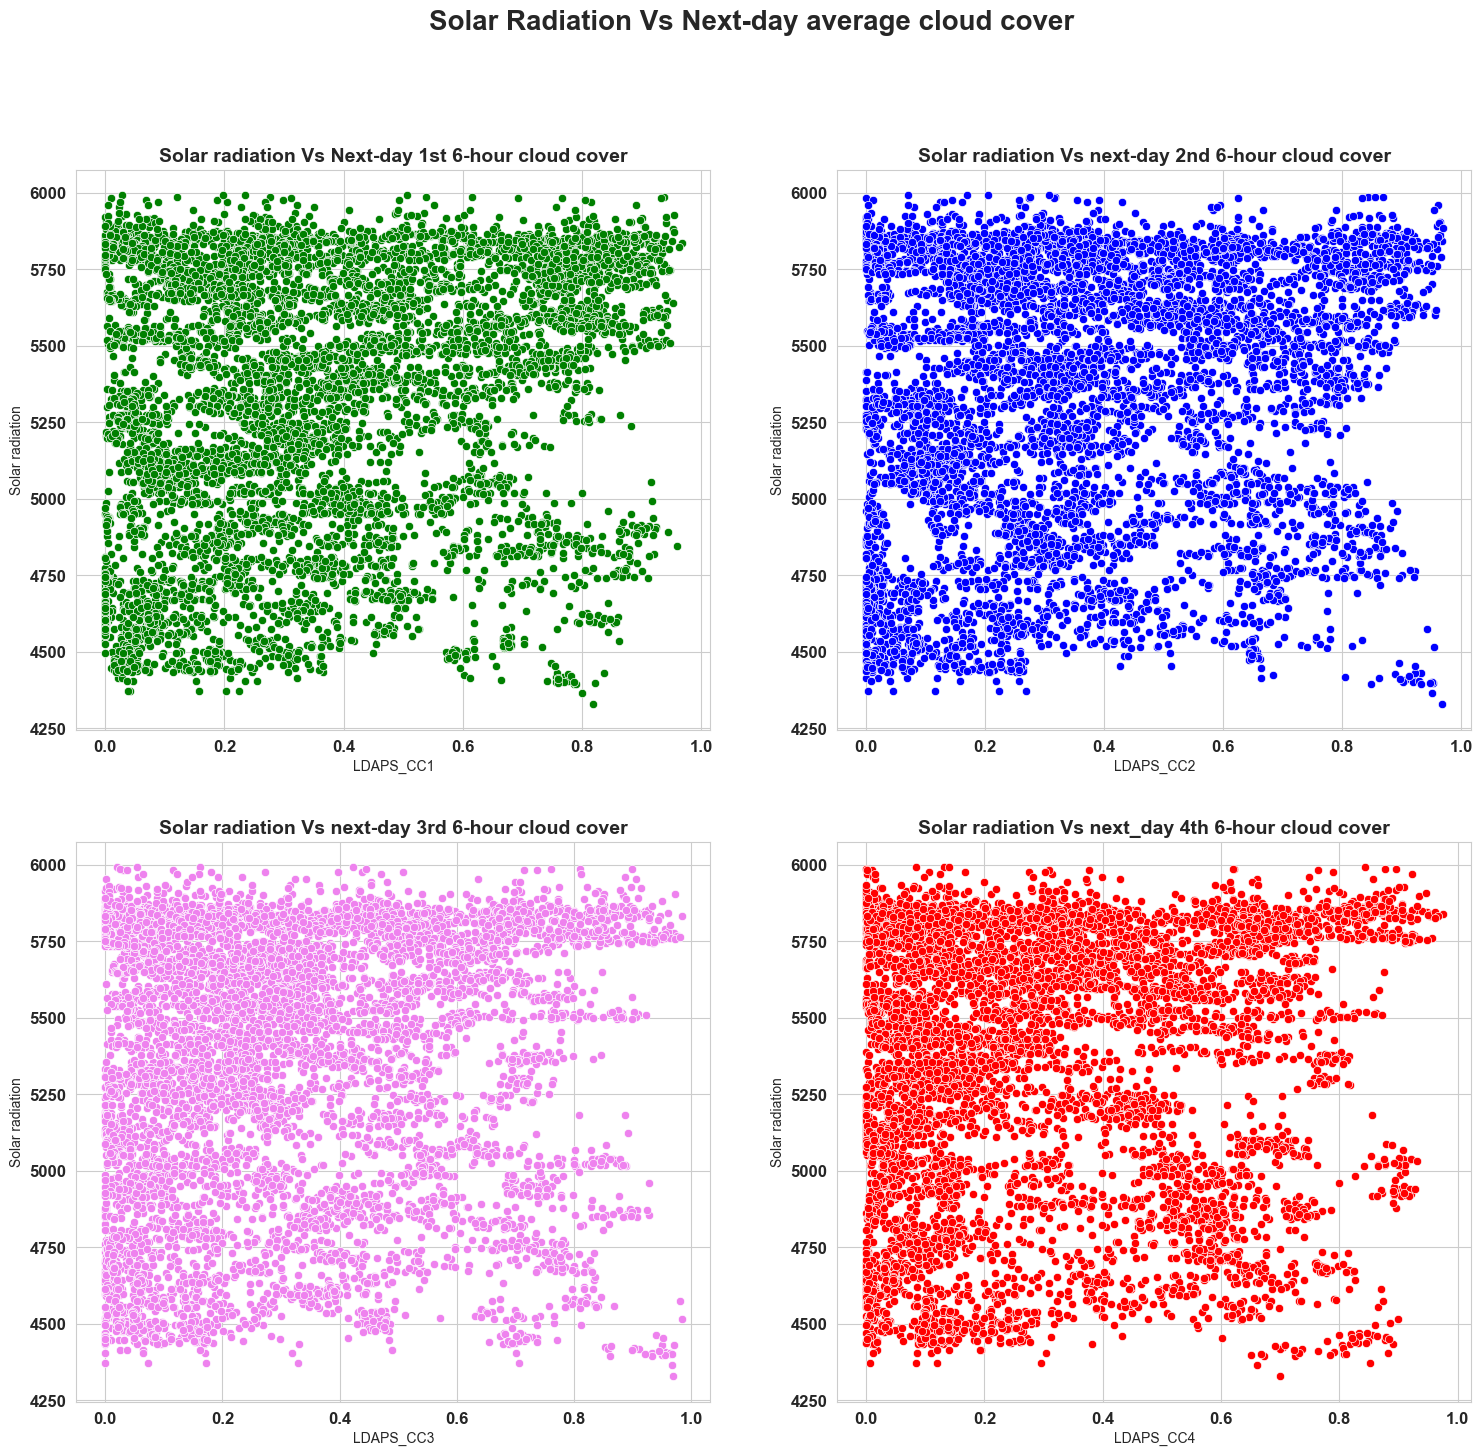

In [31]:

#Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Solar Radiation Vs Next-day average cloud cover',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Solar radiation Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Solar radiation',data=df,color="g")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Solar radiation Vs next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Solar radiation',data=df,color='b')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Solar radiation Vs next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Solar radiation',data=df,color='violet')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Solar radiation Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Solar radiation',data=df,color="r")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

- We can definitely say that for cloud cover greater than 0.7 high value solar radiation contributed most.
## ### Precipitation VS Solar radiation

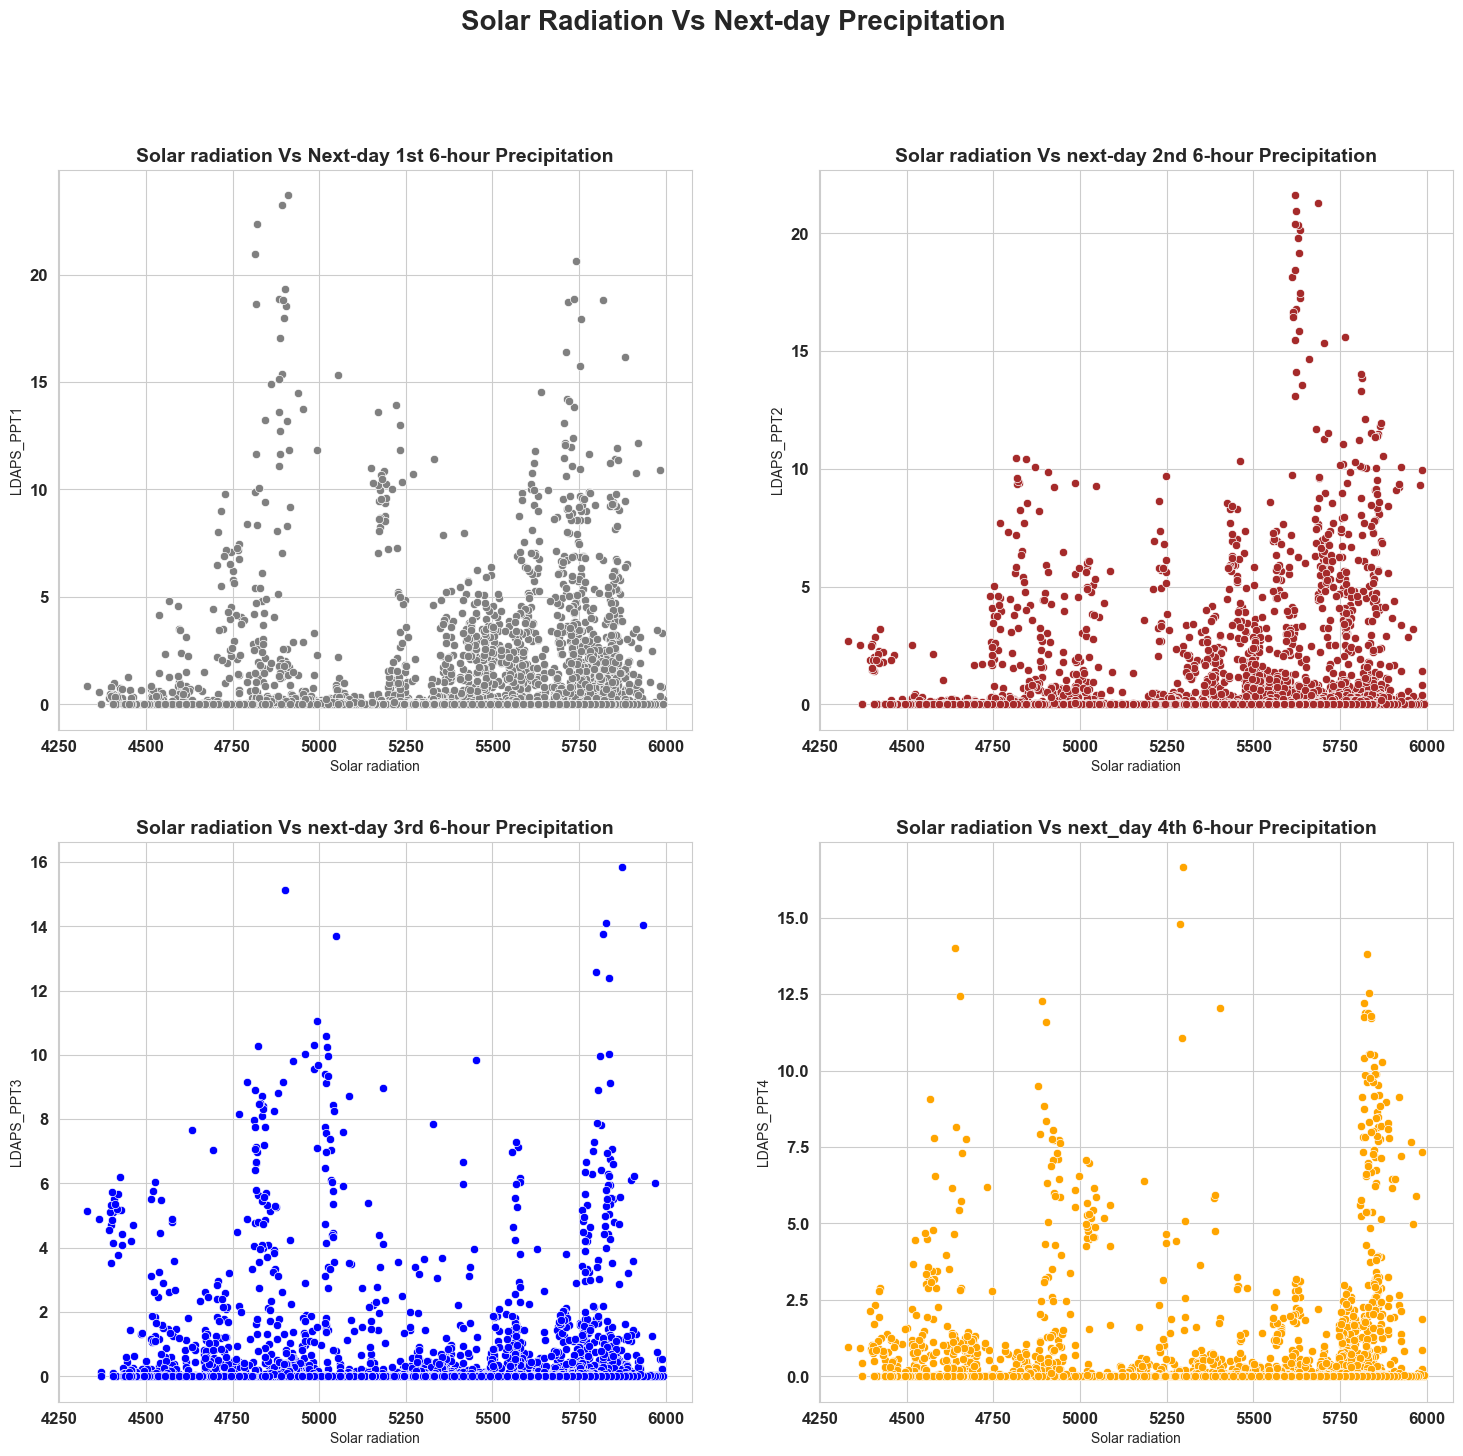

In [32]:
plt.figure(figsize=(18,16))
plt.suptitle('Solar Radiation Vs Next-day Precipitation',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Solar radiation Vs Next-day 1st 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT1',x='Solar radiation',data=df,color="grey")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Solar radiation Vs next-day 2nd 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT2',x='Solar radiation',data=df,color='brown')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Solar radiation Vs next-day 3rd 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT3',x='Solar radiation',data=df,color='blue')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Solar radiation Vs next_day 4th 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT4',x='Solar radiation',data=df,color="orange")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

- Irrespective of to which 6 hr quarter reading belong, solar radiation value greater than 5500w/m2 leads to higher amount of precipitation (normally greater than 8).
- if we consider scatterplot of solar radiation vs cloud cover along with above scatter plot, we can draw inference that for higher value of solar radiation cloud cover and precipitation followed each other. In other words higher precipitation means higher cloud cover.

Minimum Tmax applied lapse rate is 17.62495378 (Â°C) and Maximum Tmax applied lapse rate is 38.54225522 (Â°C)
Minimum Tmin is applied lapse rate 14.27264631 (Â°C) and Maximum Tmin applied lapse rate is 29.61934244 (Â°C)


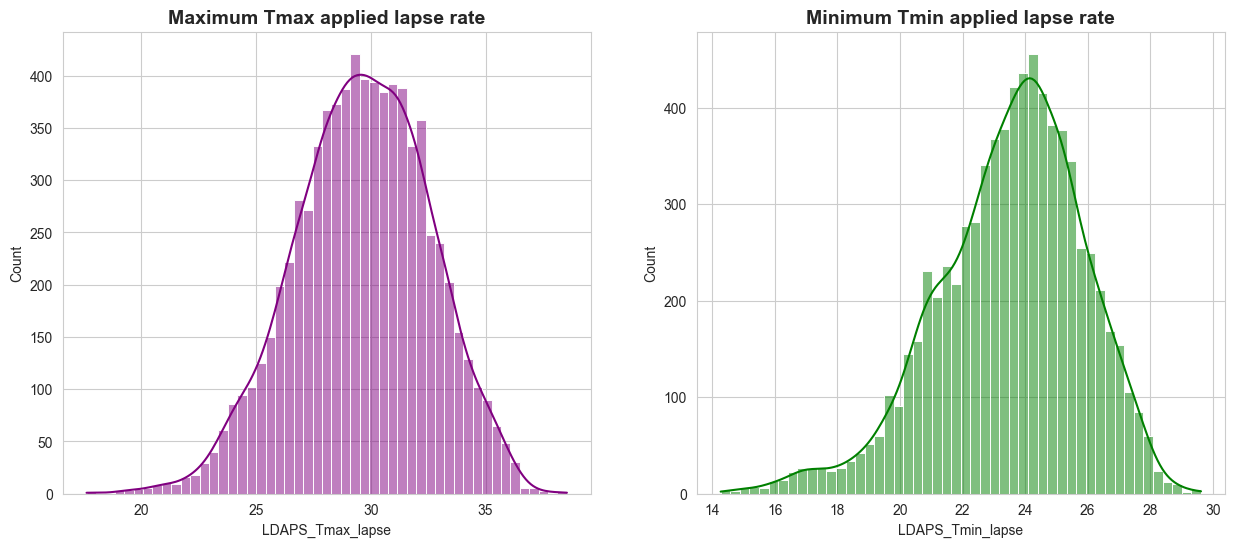

In [33]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_Tmax_lapse'],kde=True,color='purple')
plt.title('Maximum Tmax applied lapse rate',fontsize=14, fontweight='bold')
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_Tmin_lapse'],kde=True,color='green')
plt.title('Minimum Tmin applied lapse rate',fontsize=14, fontweight='bold')
print('Minimum Tmax applied lapse rate is {} (Â°C) and Maximum Tmax applied lapse rate is {} (Â°C)'.format(df['LDAPS_Tmax_lapse'].min(),df['LDAPS_Tmax_lapse'].max()))
print('Minimum Tmin is applied lapse rate {} (Â°C) and Maximum Tmin applied lapse rate is {} (Â°C)'.format(df['LDAPS_Tmin_lapse'].min(),df['LDAPS_Tmin_lapse'].max()))

- Tmax and Tmin for applied lapse rate are almost normally distributed. 
- Tmax_lapse for majority of days its values lies in the range 27 to 33 (Â°C). 
- Tmin_lapse for majority of days its values lies in the range 23 to 26 (Â°C).

Minimum Latent Heat Flux : -13.60321209
Maximum Latent Heat Flux : 213.4140062
Average Latent Heat Flux : 62.492606287988


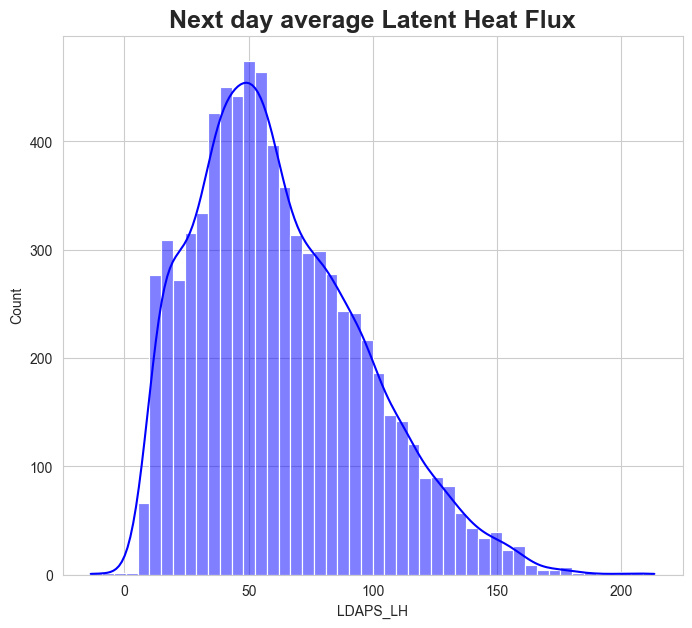

In [34]:
plt.figure(figsize=(8,7))
sns.histplot(df['LDAPS_LH'],kde=True,color='blue')
plt.title('Next day average Latent Heat Flux',fontsize=18, fontweight='bold')
print('Minimum Latent Heat Flux :',df['LDAPS_LH'].min())
print('Maximum Latent Heat Flux :',df['LDAPS_LH'].max())
print('Average Latent Heat Flux :',df['LDAPS_LH'].mean())

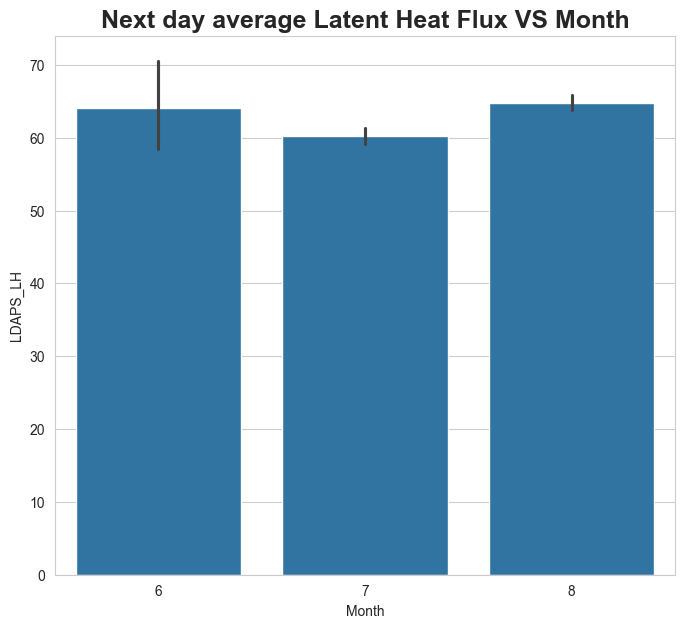

In [35]:
plt.figure(figsize=(8,7))
sns.barplot(y=df['LDAPS_LH'], x=df['Month'])
plt.title('Next day average Latent Heat Flux VS Month',fontsize=18, fontweight='bold')
plt.show()

## Encoding categorical data

In [36]:
Category = ['State', 'City']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  Day  Month  Year  State  City  
0       21.2   30      6  2013      1     6  
1       22.5   30      6  2013      1     6  
2       23.9   30      6  2013      1     6  
3       24.3   30      6  2013      1     6  
4       22.5   30      6  2013      0     3

In [37]:
df.drop(['Date'], axis=1, inplace=True)

In [38]:
df.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  Day  Month  Year  State  City  
0       21.2   30      6  2013      1     6  
1       22.5   30      6  2013      1     6  
2       23.9   30      6  2013      1     6  
3       24.3   30      6  2013      1     6  
4       22.5   30      6  2013      0     3

# Outlier Detection and Removal

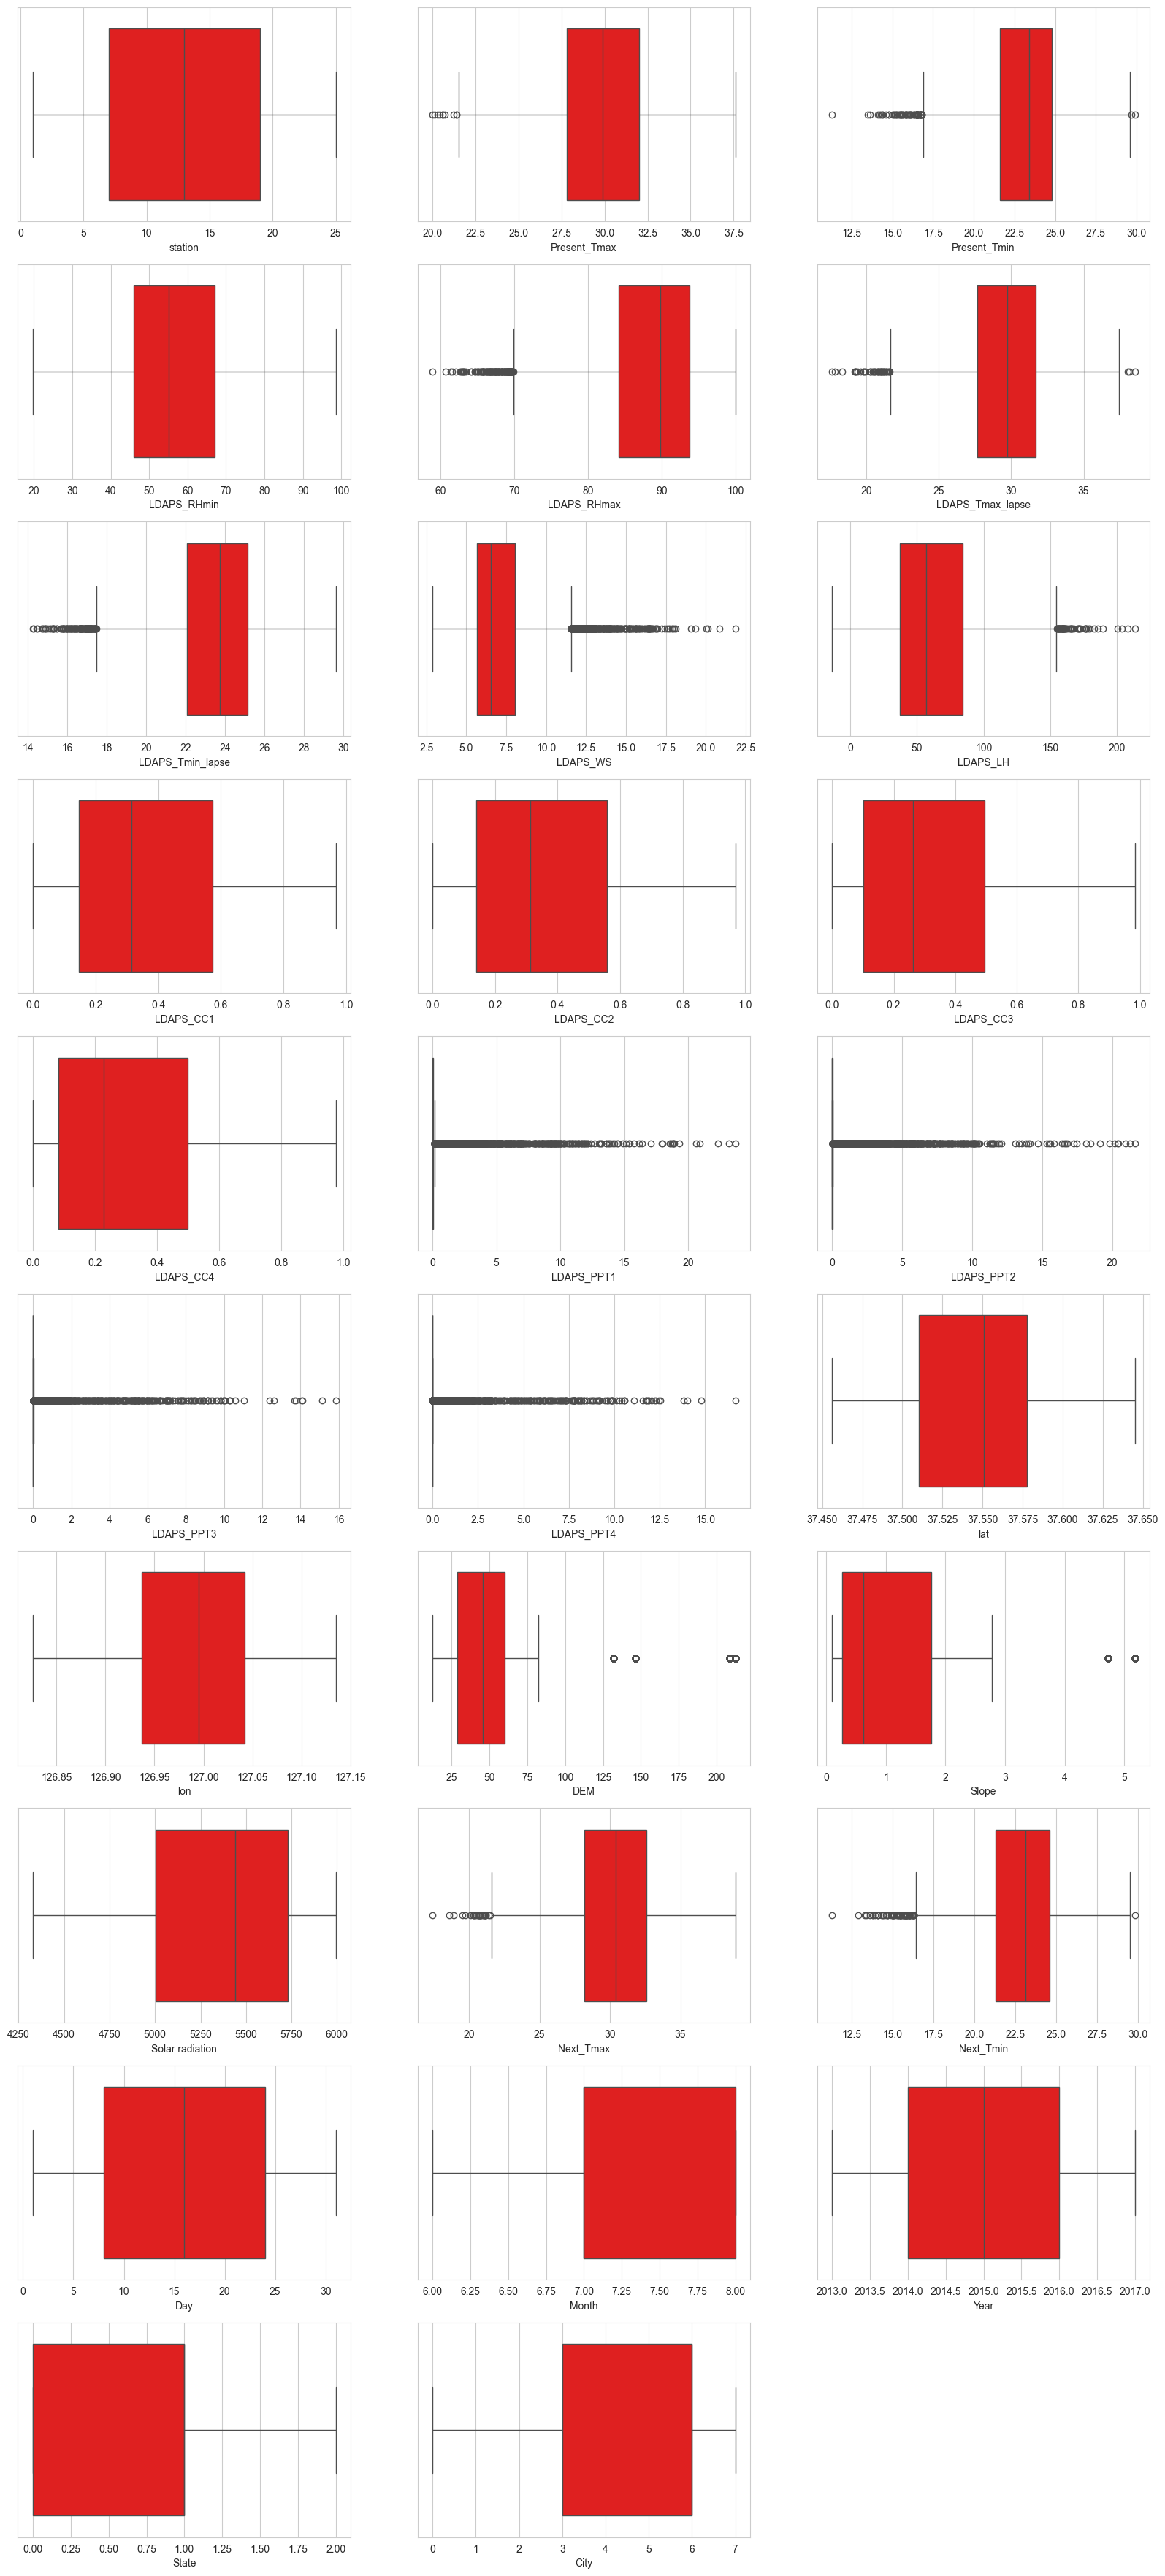

In [39]:
plt.figure(figsize=(20,45))
plotnumber=1
for column in df:
    if plotnumber<=29:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(x=df[column],color='r')
        plt.xlabel(column)
    plotnumber+=1
plt.show()

In [40]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
df1=df[(z<3).all(axis=1)]

In [41]:
df1

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.006936  6.818887   69.451805   0.233947   
1            29.850689         24.035009  5.691890   51.937448   0.225508   
2            30.091292         24.565633  6.138224   20.573050   0.209344   
3            29.704629         23.326177  5.650050   65.727144   0.216372   
4            29.113934         23.486480  5.735004  107.965535   0.151407   
...                ...               ...       ...         ...        ...   
7745         27.812697         18.303014  6.603253    9.614074   0.052902   
7746         26.704905         17.814038  5.768083   82.146707   0.066461   
7747         26.352081         18.775678  6.148918   72.058294   0.030034   
7748         27.010193         18.733519  6.542819   47.241457   0.035874   
7749         27.939516         18.522965  7.289264    9.090034   0.048954   

      LDAPS_CC2     LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0      0.203896  1.616969e-01   0.130928         0.0         0.0         0.0   
1      0.251771  1.594441e-01   0.127727         0.0         0.0         0.0   
2      0.257469  2.040915e-01   0.142125         0.0         0.0         0.0   
3      0.226002  1.611574e-01   0.134249         0.0         0.0         0.0   
4      0.249995  1.788925e-01   0.170021         0.0         0.0         0.0   
...         ...           ...        ...         ...         ...         ...   
7745   0.030169  0.000000e+00   0.004380         0.0         0.0         0.0   
7746   0.024518  5.850000e-07   0.017678         0.0         0.0         0.0   
7747   0.081035  0.000000e+00   0.000000         0.0         0.0         0.0   
7748   0.074962  0.000000e+00   0.000000         0.0         0.0         0.0   
7749   0.059869  0.000000e+00   0.000796         0.0         0.0         0.0   

      LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  \
0            0.0  37.6046  126.991  212.3350  2.7850      5992.895996   
1            0.0  37.6046  127.032   44.7624  0.5141      5869.312500   
2            0.0  37.5776  127.058   33.3068  0.2661      5863.555664   
3            0.0  37.6450  127.022   45.7160  2.5348      5856.964844   
4            0.0  37.5507  127.135   35.0380  0.5055      5859.552246   
...          ...      ...      ...       ...     ...              ...   
7745         0.0  37.5507  127.040   26.2980  0.5721      4456.024414   
7746         0.0  37.5102  127.086   21.9668  0.1332      4441.803711   
7747         0.0  37.5372  126.891   15.5876  0.1554      4443.313965   
7748         0.0  37.5237  126.909   17.2956  0.2223      4438.373535   
7749         0.0  37.5237  126.970   19.5844  0.2713      4451.345215   

      Next_Tmax  Next_Tmin  Day  Month  Year  State  City  
0          29.1       21.2   30      6  2013      1     6  
1          30.5       22.5   30      6  2013      1     6  
2          31.1       23.9   30      6  2013      1     6  
3          31.7       24.3   30      6  2013      1     6  
4          31.2       22.5   30      6  2013      0     3  
...         ...        ...  ..

In [42]:
print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)


Shape of the dataframe before removing outliers:  (7588, 29)
Shape of the dataframe after removing outliers:  (6739, 29)
Percentage of data loss post outlier removal:  11.188719030047443


# Skewness

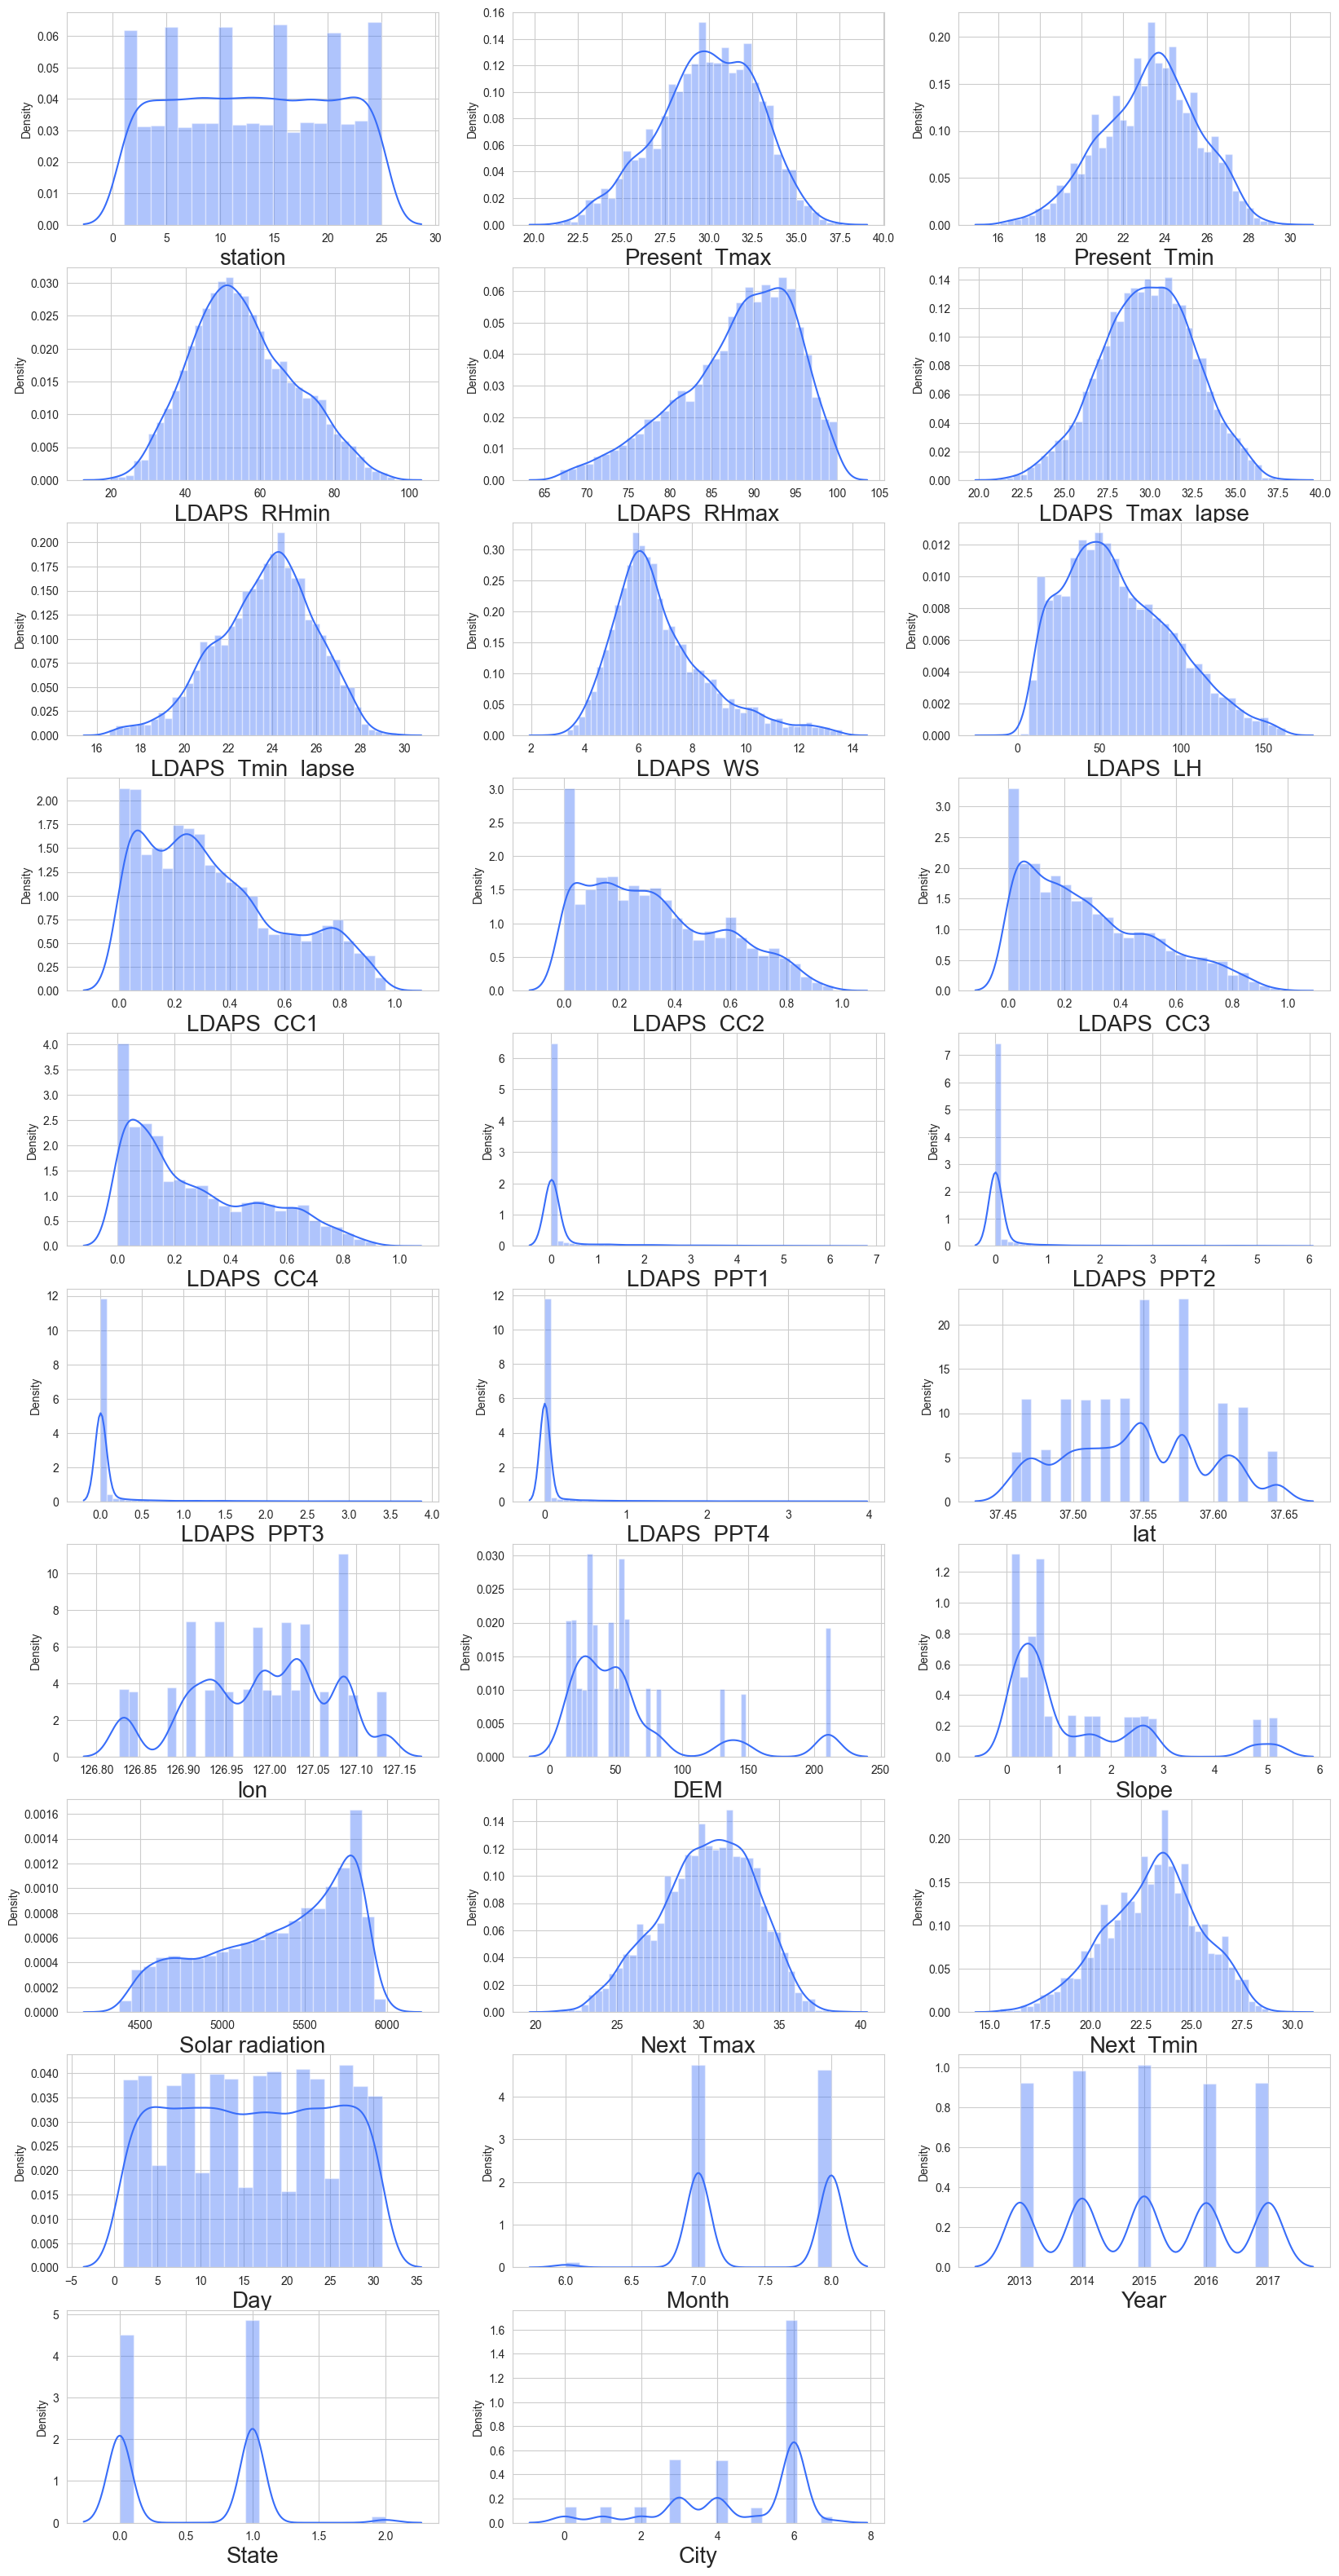

In [43]:
plt.figure(figsize=(20,40),facecolor='white')
sns.set_palette('rainbow')
plotnum=1
for col in df1:
    if plotnum<=29:
        plt.subplot(10,3,plotnum)
        sns.distplot(df1[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [44]:
df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
Day                -0.010718
Month              -0.174856
Year                0.013575
State               0.193580
City               -0.959139
dtype: float64

In [45]:
skew=['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4',
      'LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Month']
from sklearn.preprocessing import PowerTransformer


In [46]:
scaler=PowerTransformer(method="yeo-johnson")

In [47]:
df1[skew]=scaler.fit_transform(df1[skew].values)

In [48]:
df1.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.103320
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.027814
LDAPS_WS            0.007615
LDAPS_LH           -0.030736
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.094449
LDAPS_CC4           0.142061
LDAPS_PPT1          1.617538
LDAPS_PPT2          1.820237
LDAPS_PPT3          1.995359
LDAPS_PPT4          2.267954
lat                 0.106983
lon                -0.277547
DEM                 0.038830
Slope               0.233799
Solar radiation    -0.172156
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Day                 0.000057
Month              -0.087154
Year                0.025066
State               0.143188
City               -0.951530
dtype: float64

In [49]:
df1.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.110291      0.133638    -0.069582   
Present_Tmax      0.110291      1.000000      0.610428    -0.154266   
Present_Tmin      0.133638      0.610428      1.000000     0.151385   
LDAPS_RHmin      -0.069582     -0.154266      0.151385     1.000000   
LDAPS_RHmax      -0.182354     -0.320074     -0.053421     0.566069   
LDAPS_Tmax_lapse  0.066863      0.540680      0.441577    -0.555583   
LDAPS_Tmin_lapse  0.108664      0.623443      0.764041     0.114069   
LDAPS_WS          0.030231     -0.071596      0.034364     0.171684   
LDAPS_LH         -0.135717      0.119022     -0.008556    -0.002412   
LDAPS_CC1         0.008671     -0.290078      0.090828     0.574389   
LDAPS_CC2         0.006380     -0.157917      0.117894     0.713238   
LDAPS_CC3         0.006303     -0.061417      0.043629     0.636195   
LDAPS_CC4         0.011510     -0.049978      0.000193     0.459528   
LDAPS_PPT1       -0.001774     -0.190222      0.068506     0.410985   
LDAPS_PPT2       -0.006798     -0.097425      0.090113     0.510241   
LDAPS_PPT3       -0.004884     -0.022348      0.035889     0.405612   
LDAPS_PPT4       -0.000285     -0.021344     -0.063495     0.244139   
lat              -0.241811     -0.052041     -0.072707     0.090054   
lon              -0.122829      0.011132     -0.043201    -0.093969   
DEM              -0.326019     -0.130892     -0.238916     0.057460   
Slope            -0.146034     -0.092409     -0.157839     0.083910   
Solar radiation  -0.034787     -0.099696     -0.047145     0.229070   
Next_Tmax         0.106378      0.586943      0.438813    -0.433872   
Next_Tmin         0.129110      0.615950      0.785946     0.134518   
Day               0.005032     -0.130708     -0.082712    -0.073118   
Month             0.011309      0.171614      0.104576    -0.183976   
Year              0.006658      0.099185      0.099222     0.001709   
State            -0.107709     -0.049572     -0.073556    -0.078498   
City             -0.172313     -0.028619     -0.032508    -0.060087   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.182354          0.066863          0.108664  0.030231   
Present_Tmax        -0.320074          0.540680          0.623443 -0.071596   
Present_Tmin        -0.053421          0.441577          0.764041  0.034364   
LDAPS_RHmin          0.566069         -0.555583          0.114069  0.171684   
LDAPS_RHmax          1.000000         -0.403634         -0.182113  0.060965   
LDAPS_Tmax_lapse    -0.403634          1.000000          0.624572 -0.154400   
LDAPS_Tmin_lapse    -0.182113          0.624572          1.000000 -0.002164   
LDAPS_WS             0.060965         -0.154400         -0.002164  1.000000   
LDAPS_LH             0.285942          0.005878         -0.143246 -0.056362   
LDAPS_CC1            0.425827         -0.416255          0.023128  0.203057   
LDAPS_CC2            0.372085         -0.492392          0.087752  0.156336   
LDAPS_CC3            0.143375         -0.468317          0.032023  0.065764   
LDAPS_CC4            0.046555         -0.367547         -0.017483  0.090955   
LDAPS_PPT1           0.420202         -0.307565         -0.054475  0.197126   
LDAPS_PPT2           0.368154         -0.344808          0.021320  0.166155   
LDAPS_PPT3           0.219383         -0.285371         -0.018357  0.089355   
LDAPS_PPT4           0.118163         -0.207369         -0.084124  0.167950   
lat                  0.232258         -0.038285         -0.091796 -0.027463   
lon                  0.013059          0.106354         -0.025047 -0.077686   
DEM                  0.174176         -0.110286         -0.174769  0.113157   
Slope                0.209222         -0.105094         -0.160165  0.095385   
Solar radiation      0.154031         -0.034699          0.009890  0.164626   
Next_Tmax           -0.323446          0.816861          0.550810 -0.20

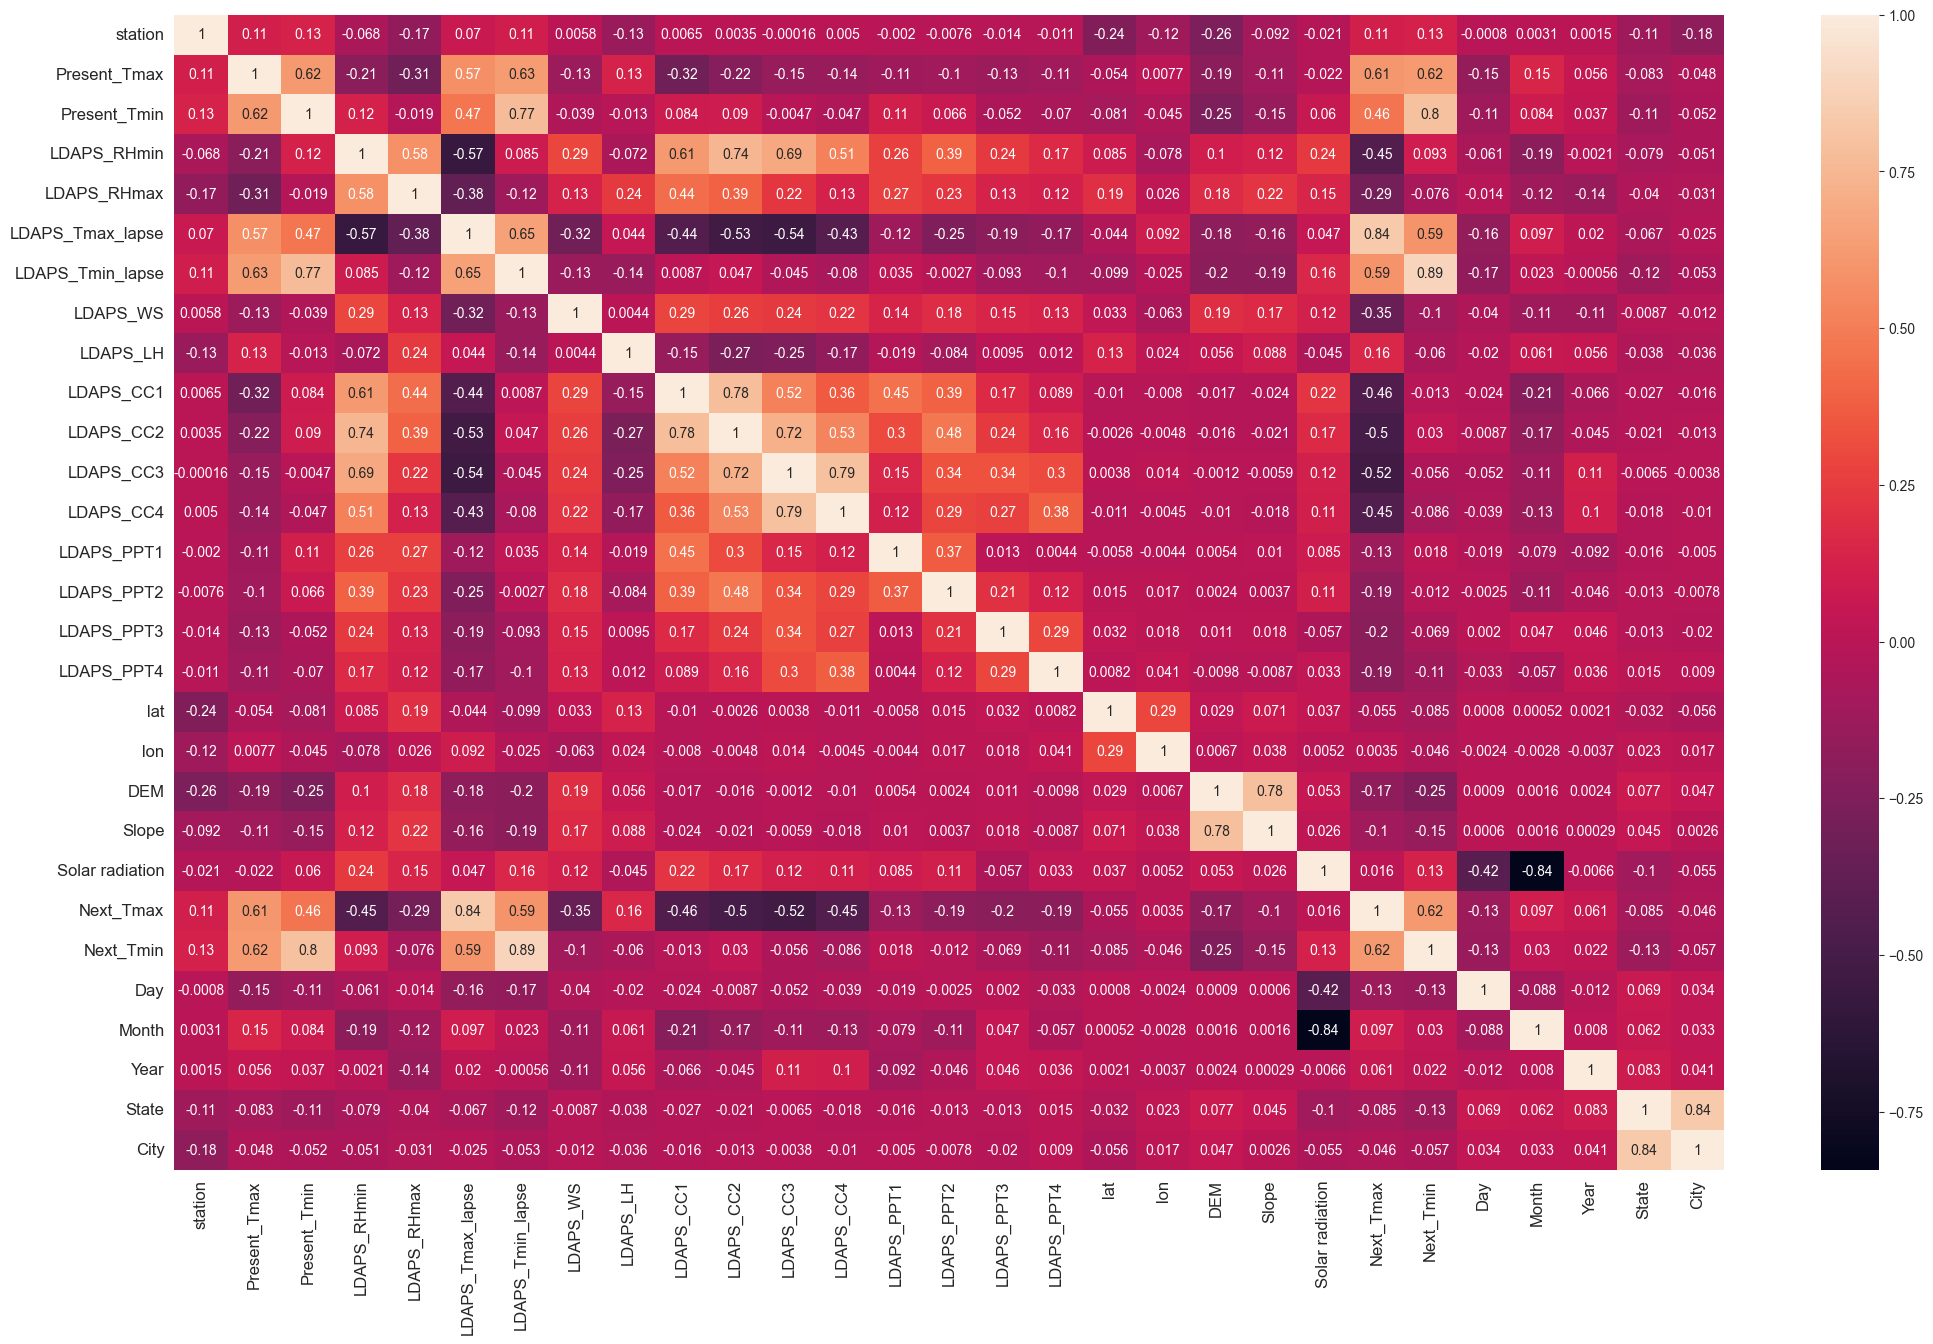

In [50]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True)
            
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Machine Learning Model

In [51]:
X = df1.drop(['Next_Tmax'], axis =1)
Y = df1['Next_Tmax']

In [52]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

## Checking Multicollinearity between features using variance_inflation_factor

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()

In [56]:
vif['VIF Values']=[variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif['Features']=X.columns
vif

VIF Values          Featires          Features
0     1.371722           station           station
1     2.903305      Present_Tmax      Present_Tmax
2     3.405399      Present_Tmin      Present_Tmin
3     6.098440       LDAPS_RHmin       LDAPS_RHmin
4     2.609329       LDAPS_RHmax       LDAPS_RHmax
5     6.667525  LDAPS_Tmax_lapse  LDAPS_Tmax_lapse
6     8.263539  LDAPS_Tmin_lapse  LDAPS_Tmin_lapse
7     1.232667          LDAPS_WS          LDAPS_WS
8     1.519175          LDAPS_LH          LDAPS_LH
9     4.867446         LDAPS_CC1         LDAPS_CC1
10    5.502914         LDAPS_CC2         LDAPS_CC2
11    4.571289         LDAPS_CC3         LDAPS_CC3
12    2.788001         LDAPS_CC4         LDAPS_CC4
13    2.601848        LDAPS_PPT1        LDAPS_PPT1
14    2.168774        LDAPS_PPT2        LDAPS_PPT2
15    1.599886        LDAPS_PPT3        LDAPS_PPT3
16    1.602887        LDAPS_PPT4        LDAPS_PPT4
17    1.620154               lat               lat
18    1.292628               lon               lon
19    4.623510               DEM               DEM
20    3.086186             Slope             Slope
21  127.563080   Solar radiation   Solar radiation
22    5.675420         Next_Tmin         Next_Tmin
23   29.643921               Day               Day
24  109.826097             Month             Month
25    1.138793              Year              Year
26    3.617181             State             State
27    3.642125              City              City

## PCA

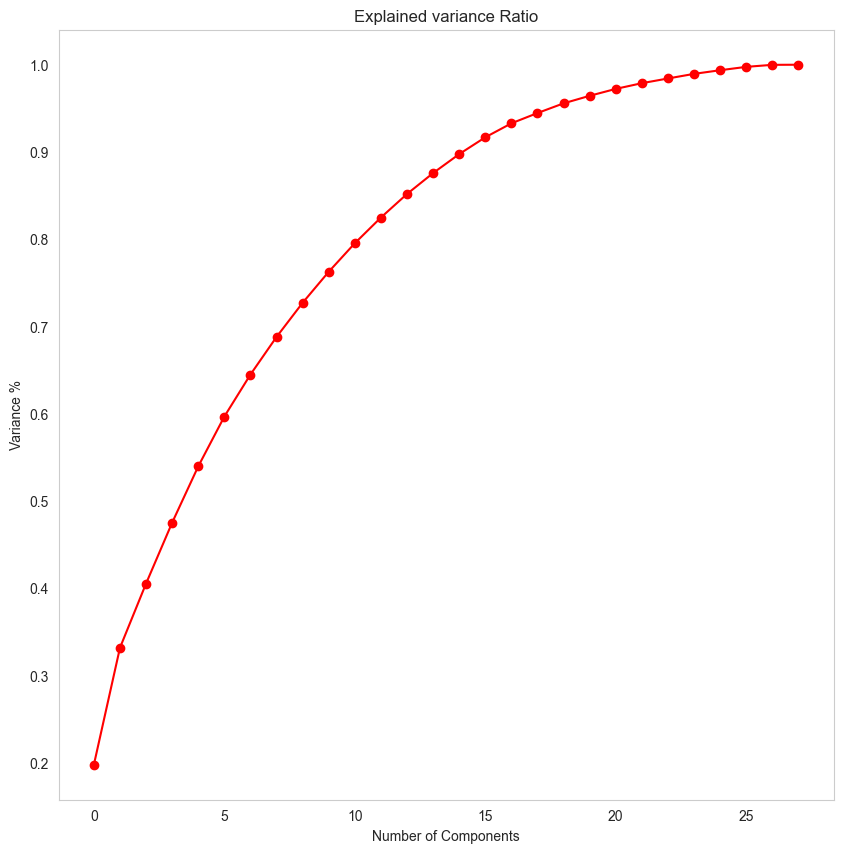

In [58]:
from sklearn.decomposition import PCA
pca=PCA()
x_pca=pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()


- AS per the graph, we can see that 15 principal components attribute for 90% of variation in the data.  We shall pick the first 15 components for our prediction.

In [59]:
pca_new = PCA(n_components=15)
x_new = pca_new.fit_transform(X_scale)

In [60]:
principle_x=pd.DataFrame(x_new,columns=np.arange(15))

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso


In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (4515, 15)
Training target vector size: (4515,)
Test feature matrix size: (2224, 15)
Test target vector size: (2224,)


In [85]:
# Finding best Random State
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.8077797748919142 on Random_state 108


In [86]:
# Linear Regression
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=108, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [32.0562119  30.06822274 29.27428528 ... 25.87811141 25.10019464
 32.55957268]


Actual Wins:
 934     32.0
4582    30.1
7277    27.8
4776    27.6
3755    29.8
        ... 
7096    36.7
7148    35.4
7667    28.4
5063    24.0
4239    32.6
Name: Next_Tmax, Length: 2224, dtype: float64


In [87]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 0.994463569338795
Mean squared error : 1.693357259657586
Root Mean Squared Error: 1.3012906130674986


 R2 Score :
0.8077797748919142


In [100]:
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor


rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.7094181654676261
Mean squared error : 0.8947804019784172
Root Mean Squared Error: 0.9459283281403603


 R2 Score :
0.8984296495558333


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.6112823741007194
Mean squared error : 0.6527259874100718
Root Mean Squared Error: 0.8079145916556228


 R2 Score :
0.9259062814309886


 Error of  DecisionTreeRegressor() :
Mean absolute error : 1.0549010791366906
Mean squared error : 2.080022482014388
Root Mean Squared Error: 1.442228304400655


 R2 Score :
0.7638877517178313


 Error of  AdaBoostRegressor() :
Mean absolute error : 1.155545607098295
Mean squared error : 2.004099177404727
Root Mean Squared Error: 1.4156620985972348


 R2 Score :
0.7725061307514263


 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.8338527718432506
Mean squared error : 1.1466316393792937
Root Mean Squared Error: 1.0708088715449147


 R2 Score :
0.8698409384195102


 Error of  XGBRegre

In [75]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.6626321287490895


In [101]:
# Cross Validation
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.6891138718297792


Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.6921430872527056


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.4069730952845691


Cross Validation Score : AdaBoostRegressor() :

Mean CV Score : 0.6520674571258868


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.7078456226295708


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max

## Hyper Parameter Tuning

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
parameter = {'n_estimators':[200,400,500,600],'gamma':np.arange(0,0.2,0.1),
              'booster' : ['gbtree','dart','gblinear'], 'max_depth':[4,6,8,10],
              'eta' : [0.001, 0.01, 0.1] }

In [102]:
GCV = GridSearchCV(XGBRegressor(),parameter,verbose =10)

In [105]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 1/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=0.211 total time=   0.0s
[CV 2/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 2/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=0.227 total time=   0.0s
[CV 3/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 3/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=0.215 total time=   0.0s
[CV 4/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 4/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=0.235 total time=   0.0s
[CV 5/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[C

[CV 5/5; 8/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=6, n_estimators=600;, score=0.545 total time=   0.7s
[CV 1/5; 9/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=200
[CV 1/5; 9/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=200;, score=0.245 total time=   0.9s
[CV 2/5; 9/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=200
[CV 2/5; 9/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=200;, score=0.256 total time=   0.8s
[CV 3/5; 9/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=200
[CV 3/5; 9/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=200;, score=0.242 total time=   0.8s
[CV 4/5; 9/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=200
[CV 4/5; 9/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=200;, score=0.263 total time=   0.7s
[CV 5/5; 9/288] START booster=gbtre

[CV 4/5; 16/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=10, n_estimators=600;, score=0.579 total time=   5.1s
[CV 5/5; 16/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=10, n_estimators=600
[CV 5/5; 16/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=10, n_estimators=600;, score=0.573 total time=   5.3s
[CV 1/5; 17/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=4, n_estimators=200
[CV 1/5; 17/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=4, n_estimators=200;, score=0.211 total time=   0.0s
[CV 2/5; 17/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=4, n_estimators=200
[CV 2/5; 17/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=4, n_estimators=200;, score=0.227 total time=   0.0s
[CV 3/5; 17/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=4, n_estimators=200
[CV 3/5; 17/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=4, n_estimators=200;, score=0.215 total time=   0.0s
[CV 4/5; 17/288] START 

[CV 3/5; 24/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=600;, score=0.531 total time=   0.7s
[CV 4/5; 24/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=600
[CV 4/5; 24/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=600;, score=0.556 total time=   0.7s
[CV 5/5; 24/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=600
[CV 5/5; 24/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=600;, score=0.545 total time=   0.7s
[CV 1/5; 25/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=8, n_estimators=200
[CV 1/5; 25/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=8, n_estimators=200;, score=0.245 total time=   0.7s
[CV 2/5; 25/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=8, n_estimators=200
[CV 2/5; 25/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=8, n_estimators=200;, score=0.256 total time=   0.7s
[CV 3/5; 25/288] START boo

[CV 2/5; 32/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=600;, score=0.572 total time=   5.6s
[CV 3/5; 32/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=600
[CV 3/5; 32/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=600;, score=0.567 total time=   5.1s
[CV 4/5; 32/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=600
[CV 4/5; 32/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=600;, score=0.579 total time=   5.4s
[CV 5/5; 32/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=600
[CV 5/5; 32/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=600;, score=0.574 total time=   5.6s
[CV 1/5; 33/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=200
[CV 1/5; 33/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=200;, score=0.764 total time=   0.1s
[CV 2/5; 33/288] STAR

[CV 1/5; 40/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=600;, score=0.895 total time=   0.9s
[CV 2/5; 40/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=600
[CV 2/5; 40/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=600;, score=0.887 total time=   0.8s
[CV 3/5; 40/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=600
[CV 3/5; 40/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=600;, score=0.897 total time=   0.7s
[CV 4/5; 40/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=600
[CV 4/5; 40/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=600;, score=0.897 total time=   0.7s
[CV 5/5; 40/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=600
[CV 5/5; 40/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=600;, score=0.899 total time=   0.8s
[CV 1/5; 41/288] START booster=gbtr

[CV 5/5; 47/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=10, n_estimators=500;, score=0.893 total time=   5.7s
[CV 1/5; 48/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=10, n_estimators=600
[CV 1/5; 48/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=10, n_estimators=600;, score=0.897 total time=   5.8s
[CV 2/5; 48/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=10, n_estimators=600
[CV 2/5; 48/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=10, n_estimators=600;, score=0.893 total time=   5.7s
[CV 3/5; 48/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=10, n_estimators=600
[CV 3/5; 48/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=10, n_estimators=600;, score=0.896 total time=   5.7s
[CV 4/5; 48/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=10, n_estimators=600
[CV 4/5; 48/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=10, n_estimators=600;, score=0.893 total time=   5.7s
[CV 5/5; 48/288] START boo

[CV 4/5; 55/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=500;, score=0.891 total time=   0.6s
[CV 5/5; 55/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=500
[CV 5/5; 55/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=500;, score=0.892 total time=   0.6s
[CV 1/5; 56/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=600
[CV 1/5; 56/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=600;, score=0.895 total time=   0.7s
[CV 2/5; 56/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=600
[CV 2/5; 56/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=600;, score=0.887 total time=   0.8s
[CV 3/5; 56/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=600
[CV 3/5; 56/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=600;, score=0.897 total time=   0.7s
[CV 4/5; 56/288] START booster=gbtr

[CV 3/5; 63/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=500;, score=0.896 total time=   3.8s
[CV 4/5; 63/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=500
[CV 4/5; 63/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=500;, score=0.891 total time=   3.9s
[CV 5/5; 63/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=500
[CV 5/5; 63/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=500;, score=0.894 total time=   3.8s
[CV 1/5; 64/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=600
[CV 1/5; 64/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=600;, score=0.898 total time=   4.0s
[CV 2/5; 64/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=600
[CV 2/5; 64/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=600;, score=0.892 total time=   4.1s
[CV 3/5; 64/288] START boo

[CV 3/5; 71/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=500;, score=0.921 total time=   0.7s
[CV 4/5; 71/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=500
[CV 4/5; 71/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=500;, score=0.923 total time=   0.6s
[CV 5/5; 71/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=500
[CV 5/5; 71/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=500;, score=0.917 total time=   0.6s
[CV 1/5; 72/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=600
[CV 1/5; 72/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=600;, score=0.924 total time=   0.7s
[CV 2/5; 72/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=600
[CV 2/5; 72/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=600;, score=0.911 total time=   0.7s
[CV 3/5; 72/288] START booster=gbtree, eta=0

[CV 3/5; 79/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=10, n_estimators=500;, score=0.897 total time=   2.3s
[CV 4/5; 79/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=10, n_estimators=500
[CV 4/5; 79/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=10, n_estimators=500;, score=0.897 total time=   2.2s
[CV 5/5; 79/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=10, n_estimators=500
[CV 5/5; 79/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=10, n_estimators=500;, score=0.900 total time=   2.3s
[CV 1/5; 80/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=10, n_estimators=600
[CV 1/5; 80/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=10, n_estimators=600;, score=0.899 total time=   2.3s
[CV 2/5; 80/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=10, n_estimators=600
[CV 2/5; 80/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=10, n_estimators=600;, score=0.894 total time=   2.3s
[CV 3/5; 80/288] START booster=gbtr

[CV 3/5; 87/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500;, score=0.913 total time=   0.2s
[CV 4/5; 87/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500
[CV 4/5; 87/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500;, score=0.917 total time=   0.2s
[CV 5/5; 87/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500
[CV 5/5; 87/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500;, score=0.915 total time=   0.2s
[CV 1/5; 88/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=600
[CV 1/5; 88/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=600;, score=0.917 total time=   0.2s
[CV 2/5; 88/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=600
[CV 2/5; 88/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=600;, score=0.906 total time=   0.2s
[CV 3/5; 88/288] START booster=gbtree, eta=0

[CV 3/5; 95/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=500;, score=0.897 total time=   0.5s
[CV 4/5; 95/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=500
[CV 4/5; 95/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=500;, score=0.896 total time=   0.5s
[CV 5/5; 95/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=500
[CV 5/5; 95/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=500;, score=0.897 total time=   0.5s
[CV 1/5; 96/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=600
[CV 1/5; 96/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=600;, score=0.894 total time=   0.5s
[CV 2/5; 96/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=600
[CV 2/5; 96/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=600;, score=0.890 total time=   0.5s
[CV 3/5; 96/288] START booster=gbtr

[CV 2/5; 103/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=500;, score=0.483 total time=  42.4s
[CV 3/5; 103/288] START booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=500
[CV 3/5; 103/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=500;, score=0.475 total time=  43.4s
[CV 4/5; 103/288] START booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=500
[CV 4/5; 103/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=500;, score=0.500 total time=  43.2s
[CV 5/5; 103/288] START booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=500
[CV 5/5; 103/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=500;, score=0.490 total time=  42.6s
[CV 1/5; 104/288] START booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=600
[CV 1/5; 104/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=600;, score=0.530 total time= 1.0min
[CV 2/5; 104/288] START booster=dar

[CV 1/5; 111/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=10, n_estimators=500;, score=0.499 total time=  48.7s
[CV 2/5; 111/288] START booster=dart, eta=0.001, gamma=0.0, max_depth=10, n_estimators=500
[CV 2/5; 111/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=10, n_estimators=500;, score=0.513 total time=  48.7s
[CV 3/5; 111/288] START booster=dart, eta=0.001, gamma=0.0, max_depth=10, n_estimators=500
[CV 3/5; 111/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=10, n_estimators=500;, score=0.506 total time=  51.0s
[CV 4/5; 111/288] START booster=dart, eta=0.001, gamma=0.0, max_depth=10, n_estimators=500
[CV 4/5; 111/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=10, n_estimators=500;, score=0.520 total time=  48.4s
[CV 5/5; 111/288] START booster=dart, eta=0.001, gamma=0.0, max_depth=10, n_estimators=500
[CV 5/5; 111/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=10, n_estimators=500;, score=0.516 total time=  49.2s
[CV 1/5; 112/288] START bo

[CV 5/5; 118/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=400;, score=0.424 total time=  27.8s
[CV 1/5; 119/288] START booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=500
[CV 1/5; 119/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=500;, score=0.475 total time=  42.7s
[CV 2/5; 119/288] START booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=500
[CV 2/5; 119/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=500;, score=0.483 total time=  42.8s
[CV 3/5; 119/288] START booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=500
[CV 3/5; 119/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=500;, score=0.475 total time=  42.6s
[CV 4/5; 119/288] START booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=500
[CV 4/5; 119/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=500;, score=0.500 total time=  44.0s
[CV 5/5; 119/288] START booster=dar

[CV 4/5; 126/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=400;, score=0.451 total time=  32.6s
[CV 5/5; 126/288] START booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=400
[CV 5/5; 126/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=400;, score=0.447 total time=  32.7s
[CV 1/5; 127/288] START booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=500
[CV 1/5; 127/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=500;, score=0.499 total time=  48.3s
[CV 2/5; 127/288] START booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=500
[CV 2/5; 127/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=500;, score=0.513 total time=  49.5s
[CV 3/5; 127/288] START booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=500
[CV 3/5; 127/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=500;, score=0.506 total time=  48.9s
[CV 4/5; 127/288] START bo

[CV 3/5; 134/288] END booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400;, score=0.881 total time=  27.7s
[CV 4/5; 134/288] START booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[CV 4/5; 134/288] END booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400;, score=0.884 total time=  27.3s
[CV 5/5; 134/288] START booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[CV 5/5; 134/288] END booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400;, score=0.884 total time=  27.6s
[CV 1/5; 135/288] START booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=500
[CV 1/5; 135/288] END booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=500;, score=0.890 total time=  42.7s
[CV 2/5; 135/288] START booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=500
[CV 2/5; 135/288] END booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=500;, score=0.882 total time=  44.4s
[CV 3/5; 135/288] START booster=dart, eta=0.

[CV 3/5; 142/288] END booster=dart, eta=0.01, gamma=0.0, max_depth=10, n_estimators=400;, score=0.890 total time=  33.2s
[CV 4/5; 142/288] START booster=dart, eta=0.01, gamma=0.0, max_depth=10, n_estimators=400
[CV 4/5; 142/288] END booster=dart, eta=0.01, gamma=0.0, max_depth=10, n_estimators=400;, score=0.887 total time=  32.0s
[CV 5/5; 142/288] START booster=dart, eta=0.01, gamma=0.0, max_depth=10, n_estimators=400
[CV 5/5; 142/288] END booster=dart, eta=0.01, gamma=0.0, max_depth=10, n_estimators=400;, score=0.889 total time=  33.3s
[CV 1/5; 143/288] START booster=dart, eta=0.01, gamma=0.0, max_depth=10, n_estimators=500
[CV 1/5; 143/288] END booster=dart, eta=0.01, gamma=0.0, max_depth=10, n_estimators=500;, score=0.894 total time=  50.7s
[CV 2/5; 143/288] START booster=dart, eta=0.01, gamma=0.0, max_depth=10, n_estimators=500
[CV 2/5; 143/288] END booster=dart, eta=0.01, gamma=0.0, max_depth=10, n_estimators=500;, score=0.891 total time=  50.4s
[CV 3/5; 143/288] START booster=dar

[CV 3/5; 150/288] END booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=400;, score=0.882 total time=  27.5s
[CV 4/5; 150/288] START booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=400
[CV 4/5; 150/288] END booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=400;, score=0.884 total time=  28.6s
[CV 5/5; 150/288] START booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=400
[CV 5/5; 150/288] END booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=400;, score=0.882 total time=  28.6s
[CV 1/5; 151/288] START booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=500
[CV 1/5; 151/288] END booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=500;, score=0.888 total time=  43.8s
[CV 2/5; 151/288] START booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=500
[CV 2/5; 151/288] END booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=500;, score=0.881 total time=  44.5s
[CV 3/5; 151/288] START booster=dart, eta=0.

[CV 3/5; 158/288] END booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=400;, score=0.892 total time=  31.8s
[CV 4/5; 158/288] START booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=400
[CV 4/5; 158/288] END booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=400;, score=0.887 total time=  32.5s
[CV 5/5; 158/288] START booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=400
[CV 5/5; 158/288] END booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=400;, score=0.889 total time=  31.4s
[CV 1/5; 159/288] START booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=500
[CV 1/5; 159/288] END booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=500;, score=0.896 total time=  49.1s
[CV 2/5; 159/288] START booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=500
[CV 2/5; 159/288] END booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=500;, score=0.890 total time=  48.1s
[CV 3/5; 159/288] START booster=dar

[CV 3/5; 166/288] END booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400;, score=0.919 total time=  27.5s
[CV 4/5; 166/288] START booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400
[CV 4/5; 166/288] END booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400;, score=0.923 total time=  27.5s
[CV 5/5; 166/288] START booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400
[CV 5/5; 166/288] END booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400;, score=0.917 total time=  28.1s
[CV 1/5; 167/288] START booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=500
[CV 1/5; 167/288] END booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=500;, score=0.923 total time=  43.6s
[CV 2/5; 167/288] START booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=500
[CV 2/5; 167/288] END booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=500;, score=0.911 total time=  43.1s
[CV 3/5; 167/288] START booster=dart, eta=0.1, gamma=

[CV 3/5; 174/288] END booster=dart, eta=0.1, gamma=0.0, max_depth=10, n_estimators=400;, score=0.897 total time=  30.3s
[CV 4/5; 174/288] START booster=dart, eta=0.1, gamma=0.0, max_depth=10, n_estimators=400
[CV 4/5; 174/288] END booster=dart, eta=0.1, gamma=0.0, max_depth=10, n_estimators=400;, score=0.897 total time=  31.5s
[CV 5/5; 174/288] START booster=dart, eta=0.1, gamma=0.0, max_depth=10, n_estimators=400
[CV 5/5; 174/288] END booster=dart, eta=0.1, gamma=0.0, max_depth=10, n_estimators=400;, score=0.900 total time=  30.3s
[CV 1/5; 175/288] START booster=dart, eta=0.1, gamma=0.0, max_depth=10, n_estimators=500
[CV 1/5; 175/288] END booster=dart, eta=0.1, gamma=0.0, max_depth=10, n_estimators=500;, score=0.899 total time=  46.1s
[CV 2/5; 175/288] START booster=dart, eta=0.1, gamma=0.0, max_depth=10, n_estimators=500
[CV 2/5; 175/288] END booster=dart, eta=0.1, gamma=0.0, max_depth=10, n_estimators=500;, score=0.894 total time=  46.4s
[CV 3/5; 175/288] START booster=dart, eta=0.

[CV 3/5; 182/288] END booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=400;, score=0.913 total time=  26.9s
[CV 4/5; 182/288] START booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=400
[CV 4/5; 182/288] END booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=400;, score=0.917 total time=  26.8s
[CV 5/5; 182/288] START booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=400
[CV 5/5; 182/288] END booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=400;, score=0.915 total time=  28.8s
[CV 1/5; 183/288] START booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500
[CV 1/5; 183/288] END booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500;, score=0.917 total time=  42.7s
[CV 2/5; 183/288] START booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500
[CV 2/5; 183/288] END booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500;, score=0.906 total time=  41.7s
[CV 3/5; 183/288] START booster=dart, eta=0.1, gamma=

[CV 3/5; 190/288] END booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=400;, score=0.897 total time=  27.0s
[CV 4/5; 190/288] START booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=400
[CV 4/5; 190/288] END booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=400;, score=0.896 total time=  27.9s
[CV 5/5; 190/288] START booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=400
[CV 5/5; 190/288] END booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=400;, score=0.897 total time=  26.8s
[CV 1/5; 191/288] START booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=500
[CV 1/5; 191/288] END booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=500;, score=0.894 total time=  41.7s
[CV 2/5; 191/288] START booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=500
[CV 2/5; 191/288] END booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=500;, score=0.890 total time=  41.2s
[CV 3/5; 191/288] START booster=dart, eta=0.

[CV 2/5; 198/288] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=6, n_estimators=400;, score=0.706 total time=   0.0s
[CV 3/5; 198/288] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=6, n_estimators=400
[CV 3/5; 198/288] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=6, n_estimators=400;, score=0.672 total time=   0.0s
[CV 4/5; 198/288] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=6, n_estimators=400
[CV 4/5; 198/288] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=6, n_estimators=400;, score=0.711 total time=   0.0s
[CV 5/5; 198/288] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=6, n_estimators=400
[CV 5/5; 198/288] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=6, n_estimators=400;, score=0.697 total time=   0.0s
[CV 1/5; 199/288] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=6, n_estimators=500
[CV 1/5; 199/288] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=6, n_estimators=500;, score=0.722 total time=   0.1s

[CV 5/5; 205/288] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=10, n_estimators=200;, score=0.596 total time=   0.0s
[CV 1/5; 206/288] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=10, n_estimators=400
[CV 1/5; 206/288] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=10, n_estimators=400;, score=0.706 total time=   0.0s
[CV 2/5; 206/288] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=10, n_estimators=400
[CV 2/5; 206/288] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=10, n_estimators=400;, score=0.706 total time=   0.0s
[CV 3/5; 206/288] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=10, n_estimators=400
[CV 3/5; 206/288] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=10, n_estimators=400;, score=0.672 total time=   0.0s
[CV 4/5; 206/288] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=10, n_estimators=400
[CV 4/5; 206/288] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=10, n_estimators=400;, score=0.711 total tim

[CV 5/5; 213/288] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=200;, score=0.596 total time=   0.0s
[CV 1/5; 214/288] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=400
[CV 1/5; 214/288] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=400;, score=0.706 total time=   0.0s
[CV 2/5; 214/288] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=400
[CV 2/5; 214/288] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=400;, score=0.706 total time=   0.0s
[CV 3/5; 214/288] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=400
[CV 3/5; 214/288] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=400;, score=0.672 total time=   0.0s
[CV 4/5; 214/288] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=400
[CV 4/5; 214/288] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=400;, score=0.711 total time=   0.0s

[CV 5/5; 221/288] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=10, n_estimators=200;, score=0.596 total time=   0.0s
[CV 1/5; 222/288] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=10, n_estimators=400
[CV 1/5; 222/288] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=10, n_estimators=400;, score=0.706 total time=   0.0s
[CV 2/5; 222/288] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=10, n_estimators=400
[CV 2/5; 222/288] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=10, n_estimators=400;, score=0.706 total time=   0.0s
[CV 3/5; 222/288] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=10, n_estimators=400
[CV 3/5; 222/288] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=10, n_estimators=400;, score=0.672 total time=   0.0s
[CV 4/5; 222/288] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=10, n_estimators=400
[CV 4/5; 222/288] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=10, n_estimators=400;, score=0.711 total tim

[CV 5/5; 229/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=200;, score=0.759 total time=   0.0s
[CV 1/5; 230/288] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[CV 1/5; 230/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400;, score=0.760 total time=   0.0s
[CV 2/5; 230/288] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[CV 2/5; 230/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400;, score=0.760 total time=   0.0s
[CV 3/5; 230/288] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[CV 3/5; 230/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400;, score=0.748 total time=   0.0s
[CV 4/5; 230/288] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[CV 4/5; 230/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400;, score=0.762 total time=   0.0s
[CV 5/5;

[CV 5/5; 237/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=10, n_estimators=200;, score=0.759 total time=   0.0s
[CV 1/5; 238/288] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=10, n_estimators=400
[CV 1/5; 238/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=10, n_estimators=400;, score=0.760 total time=   0.0s
[CV 2/5; 238/288] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=10, n_estimators=400
[CV 2/5; 238/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=10, n_estimators=400;, score=0.760 total time=   0.0s
[CV 3/5; 238/288] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=10, n_estimators=400
[CV 3/5; 238/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=10, n_estimators=400;, score=0.748 total time=   0.0s
[CV 4/5; 238/288] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=10, n_estimators=400
[CV 4/5; 238/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=10, n_estimators=400;, score=0.762 total time=   0.0s

[CV 5/5; 245/288] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=6, n_estimators=200;, score=0.759 total time=   0.0s
[CV 1/5; 246/288] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=6, n_estimators=400
[CV 1/5; 246/288] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=6, n_estimators=400;, score=0.760 total time=   0.0s
[CV 2/5; 246/288] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=6, n_estimators=400
[CV 2/5; 246/288] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=6, n_estimators=400;, score=0.760 total time=   0.0s
[CV 3/5; 246/288] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=6, n_estimators=400
[CV 3/5; 246/288] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=6, n_estimators=400;, score=0.748 total time=   0.0s
[CV 4/5; 246/288] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=6, n_estimators=400
[CV 4/5; 246/288] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=6, n_estimators=400;, score=0.762 total time=   0.0s
[CV 5/5;

[CV 5/5; 253/288] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=10, n_estimators=200;, score=0.759 total time=   0.0s
[CV 1/5; 254/288] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=10, n_estimators=400
[CV 1/5; 254/288] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=10, n_estimators=400;, score=0.760 total time=   0.0s
[CV 2/5; 254/288] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=10, n_estimators=400
[CV 2/5; 254/288] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=10, n_estimators=400;, score=0.760 total time=   0.0s
[CV 3/5; 254/288] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=10, n_estimators=400
[CV 3/5; 254/288] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=10, n_estimators=400;, score=0.748 total time=   0.0s
[CV 4/5; 254/288] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=10, n_estimators=400
[CV 4/5; 254/288] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=10, n_estimators=400;, score=0.762 total time=   0.0s

[CV 5/5; 261/288] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=200;, score=0.784 total time=   0.0s
[CV 1/5; 262/288] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400
[CV 1/5; 262/288] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400;, score=0.768 total time=   0.0s
[CV 2/5; 262/288] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400
[CV 2/5; 262/288] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400;, score=0.773 total time=   0.0s
[CV 3/5; 262/288] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400
[CV 3/5; 262/288] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400;, score=0.764 total time=   0.0s
[CV 4/5; 262/288] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400
[CV 4/5; 262/288] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400;, score=0.767 total time=   0.0s
[CV 5/5; 262/288]

[CV 4/5; 269/288] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=10, n_estimators=200;, score=0.767 total time=   0.0s
[CV 5/5; 269/288] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=10, n_estimators=200
[CV 5/5; 269/288] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=10, n_estimators=200;, score=0.784 total time=   0.0s
[CV 1/5; 270/288] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=10, n_estimators=400
[CV 1/5; 270/288] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=10, n_estimators=400;, score=0.768 total time=   0.0s
[CV 2/5; 270/288] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=10, n_estimators=400
[CV 2/5; 270/288] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=10, n_estimators=400;, score=0.773 total time=   0.0s
[CV 3/5; 270/288] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=10, n_estimators=400
[CV 3/5; 270/288] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=10, n_estimators=400;, score=0.764 total time=   0.0s
[CV 4/5;

[CV 5/5; 277/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=200;, score=0.784 total time=   0.0s
[CV 1/5; 278/288] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=400
[CV 1/5; 278/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=400;, score=0.768 total time=   0.0s
[CV 2/5; 278/288] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=400
[CV 2/5; 278/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=400;, score=0.773 total time=   0.0s
[CV 3/5; 278/288] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=400
[CV 3/5; 278/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=400;, score=0.764 total time=   0.0s
[CV 4/5; 278/288] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=400
[CV 4/5; 278/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=400;, score=0.767 total time=   0.0s
[CV 5/5; 278/288]

[CV 5/5; 285/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=200;, score=0.784 total time=   0.0s
[CV 1/5; 286/288] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=400
[CV 1/5; 286/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=400;, score=0.768 total time=   0.0s
[CV 2/5; 286/288] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=400
[CV 2/5; 286/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=400;, score=0.773 total time=   0.0s
[CV 3/5; 286/288] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=400
[CV 3/5; 286/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=400;, score=0.764 total time=   0.0s
[CV 4/5; 286/288] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=400
[CV 4/5; 286/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=400;, score=0.767 total time=   0.0s
[CV 5/5;

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'booster': ['gbtree', 'dart', 'gblinear'],
                         'eta': [0.001, 0.01, 0.1], 'gamma': array([0. , 0.1]),
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [200, 400, 500, 600]},
             verbose=10)

In [106]:
GCV.best_params_

{'booster': 'gbtree',
 'eta': 0.1,
 'gamma': np.float64(0.0),
 'max_depth': 4,
 'n_estimators': 600}

## Final Regression Model

In [107]:
Final_mod =  XGBRegressor(n_estimators=100 , booster= 'dart', eta= 0.1, max_depth= 10, gamma= 0.0 )
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.6525314994853177
Mean squared error : 0.7732889392970416
Root Mean Squared Error: 0.8793684889152223


 R2 Score of Final Model :
0.9122206651091884




# For Next_Tmin

In [108]:
X = df.drop(['Next_Tmin'], axis =1)
Y = df['Next_Tmin']

In [109]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [110]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (5083, 28)
Training target vector size: (5083,)
Test feature matrix size: (2505, 28)
Test target vector size: (2505,)


In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.8633877781304345 on Random_state 103


In [112]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=43, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)

print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [19.97801132 23.62867787 24.89929024 ... 24.33979374 25.48831057
 19.30670371]


Actual Wins:
 5083    20.3
1512    23.5
4053    23.4
3813    24.2
3776    24.0
        ... 
7419    22.6
7141    23.4
3378    23.8
5832    26.4
3506    18.7
Name: Next_Tmin, Length: 2505, dtype: float64


In [113]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 0.7408329777241602
Mean squared error : 0.8846256341249565
Root Mean Squared Error: 0.9405453918471753


 R2 Score :
0.8561274835183728


In [114]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.7936663115608846


In [115]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.5635820359281435
Mean squared error : 0.5481273944111774
Root Mean Squared Error: 0.7403562618166861


 R2 Score :
0.9108544173440556


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.5234578842315366
Mean squared error : 0.47778460518962046
Root Mean Squared Error: 0.6912196504654801


 R2 Score :
0.9222947302981934


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.8324550898203593
Mean squared error : 1.2942235528942114
Root Mean Squared Error: 1.1376394652499584


 R2 Score :
0.7895118655148752


 Error of  AdaBoostRegressor() :
Mean absolute error : 0.8203447664699337
Mean squared error : 1.0410323858207169
Root Mean Squared Error: 1.020309945957951


 R2 Score :
0.8306900192474611


 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.6094547801367892
Mean squared error : 0.6077107088046294
Root Mean Squared Error: 0.7795580214484548


 R2 Score :
0.9011639889284451


 Error of  XGBR

In [116]:
# Cross Validation
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.7942497318874918


Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.7997926104655908


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.5697761070198235


Cross Validation Score : AdaBoostRegressor() :

Mean CV Score : 0.7527348361040586


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.8054940595239417


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max

# Hyper Parameter Tuning : GridSearchCV

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
parameter = {'n_estimators':[50,75,100],'gamma':np.arange(0,0.2,0.1),
              'booster' : ['gbtree','dart','gblinear'], 'max_depth':[4,6,8,10],
              'eta' : [0.001, 0.01, 0.1] }

In [119]:
GCV = GridSearchCV(XGBRegressor(),parameter,verbose =10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 1/5; 1/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=0.074 total time=   0.0s
[CV 2/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 2/5; 1/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=0.074 total time=   0.0s
[CV 3/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 3/5; 1/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=0.072 total time=   0.0s
[CV 4/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 4/5; 1/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=0.075 total time=   0.0s
[CV 5/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 5/5; 1/

[CV 5/5; 8/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75;, score=0.118 total time=   0.3s
[CV 1/5; 9/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100
[CV 1/5; 9/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100;, score=0.149 total time=   0.3s
[CV 2/5; 9/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100
[CV 2/5; 9/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100;, score=0.149 total time=   0.4s
[CV 3/5; 9/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100
[CV 3/5; 9/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100;, score=0.148 total time=   0.3s
[CV 4/5; 9/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100
[CV 4/5; 9/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100;, score=0.153 total time=   0.3s
[CV 5/5; 9/216] START booster=gbtree

[CV 4/5; 16/216] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50;, score=0.079 total time=   0.0s
[CV 5/5; 16/216] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50
[CV 5/5; 16/216] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50;, score=0.079 total time=   0.0s
[CV 1/5; 17/216] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75
[CV 1/5; 17/216] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75;, score=0.112 total time=   0.0s
[CV 2/5; 17/216] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75
[CV 2/5; 17/216] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75;, score=0.112 total time=   0.0s
[CV 3/5; 17/216] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75
[CV 3/5; 17/216] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75;, score=0.111 total time=   0.0s
[CV 4/5; 17/216] START booster=gbtr

[CV 3/5; 24/216] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100;, score=0.149 total time=   0.8s
[CV 4/5; 24/216] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100
[CV 4/5; 24/216] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100;, score=0.154 total time=   0.9s
[CV 5/5; 24/216] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100
[CV 5/5; 24/216] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100;, score=0.152 total time=   0.9s
[CV 1/5; 25/216] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50
[CV 1/5; 25/216] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50;, score=0.501 total time=   0.0s
[CV 2/5; 25/216] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50
[CV 2/5; 25/216] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50;, score=0.504 total time=   0.0s
[CV 3/5; 25/216] START booste

[CV 3/5; 32/216] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75;, score=0.658 total time=   0.3s
[CV 4/5; 32/216] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75
[CV 4/5; 32/216] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75;, score=0.667 total time=   0.3s
[CV 5/5; 32/216] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75
[CV 5/5; 32/216] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75;, score=0.671 total time=   0.3s
[CV 1/5; 33/216] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100
[CV 1/5; 33/216] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100;, score=0.741 total time=   0.4s
[CV 2/5; 33/216] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100
[CV 2/5; 33/216] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100;, score=0.747 total time=   0.4s
[CV 3/5; 33/216] START booster=gbtree, e

[CV 4/5; 40/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=0.532 total time=   0.0s
[CV 5/5; 40/216] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50
[CV 5/5; 40/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=0.535 total time=   0.0s
[CV 1/5; 41/216] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=75
[CV 1/5; 41/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=75;, score=0.647 total time=   0.0s
[CV 2/5; 41/216] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=75
[CV 2/5; 41/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=75;, score=0.650 total time=   0.0s
[CV 3/5; 41/216] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=75
[CV 3/5; 41/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=75;, score=0.644 total time=   0.0s
[CV 4/5; 41/216] START booster=gbtree, eta=0

[CV 3/5; 48/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100;, score=0.744 total time=   1.0s
[CV 4/5; 48/216] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100
[CV 4/5; 48/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100;, score=0.753 total time=   1.0s
[CV 5/5; 48/216] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100
[CV 5/5; 48/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100;, score=0.756 total time=   0.9s
[CV 1/5; 49/216] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=4, n_estimators=50
[CV 1/5; 49/216] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=4, n_estimators=50;, score=0.885 total time=   0.0s
[CV 2/5; 49/216] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=4, n_estimators=50
[CV 2/5; 49/216] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=4, n_estimators=50;, score=0.894 total time=   0.0s
[CV 3/5; 49/216] START booster=gbtree,

[CV 3/5; 56/216] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75;, score=0.919 total time=   0.2s
[CV 4/5; 56/216] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75
[CV 4/5; 56/216] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75;, score=0.930 total time=   0.3s
[CV 5/5; 56/216] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75
[CV 5/5; 56/216] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75;, score=0.926 total time=   0.2s
[CV 1/5; 57/216] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=100
[CV 1/5; 57/216] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=100;, score=0.927 total time=   0.3s
[CV 2/5; 57/216] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=100
[CV 2/5; 57/216] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=100;, score=0.928 total time=   0.3s
[CV 3/5; 57/216] START booster=gbtree, eta=0.1, g

[CV 5/5; 64/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50;, score=0.917 total time=   0.0s
[CV 1/5; 65/216] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=75
[CV 1/5; 65/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=75;, score=0.922 total time=   0.0s
[CV 2/5; 65/216] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=75
[CV 2/5; 65/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=75;, score=0.924 total time=   0.0s
[CV 3/5; 65/216] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=75
[CV 3/5; 65/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=75;, score=0.922 total time=   0.0s
[CV 4/5; 65/216] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=75
[CV 4/5; 65/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=75;, score=0.931 total time=   0.0s
[CV 5/5; 65/216] START booster=gbtree, eta=0.1, gamma

[CV 5/5; 72/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100;, score=0.914 total time=   0.4s
[CV 1/5; 73/216] START booster=dart, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 1/5; 73/216] END booster=dart, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=0.074 total time=   0.4s
[CV 2/5; 73/216] START booster=dart, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 2/5; 73/216] END booster=dart, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=0.074 total time=   0.4s
[CV 3/5; 73/216] START booster=dart, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 3/5; 73/216] END booster=dart, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=0.072 total time=   0.4s
[CV 4/5; 73/216] START booster=dart, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 4/5; 73/216] END booster=dart, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=0.075 total time=   0.4s
[CV 5/5; 73/216] START booster=dart, eta=0.001, gam

[CV 5/5; 80/216] END booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75;, score=0.118 total time=   1.3s
[CV 1/5; 81/216] START booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100
[CV 1/5; 81/216] END booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100;, score=0.149 total time=   2.1s
[CV 2/5; 81/216] START booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100
[CV 2/5; 81/216] END booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100;, score=0.149 total time=   2.2s
[CV 3/5; 81/216] START booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100
[CV 3/5; 81/216] END booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100;, score=0.148 total time=   2.2s
[CV 4/5; 81/216] START booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100
[CV 4/5; 81/216] END booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100;, score=0.153 total time=   2.4s
[CV 5/5; 81/216] START booster=dart, eta=0.00

[CV 5/5; 88/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50;, score=0.079 total time=   0.4s
[CV 1/5; 89/216] START booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75
[CV 1/5; 89/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75;, score=0.112 total time=   1.0s
[CV 2/5; 89/216] START booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75
[CV 2/5; 89/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75;, score=0.112 total time=   1.0s
[CV 3/5; 89/216] START booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75
[CV 3/5; 89/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75;, score=0.111 total time=   1.1s
[CV 4/5; 89/216] START booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75
[CV 4/5; 89/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75;, score=0.116 total time=   1.0s
[CV 5/5; 89/216] START booster=dart, eta=0.001, gamma

[CV 5/5; 96/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100;, score=0.152 total time=   2.8s
[CV 1/5; 97/216] START booster=dart, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50
[CV 1/5; 97/216] END booster=dart, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50;, score=0.501 total time=   0.4s
[CV 2/5; 97/216] START booster=dart, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50
[CV 2/5; 97/216] END booster=dart, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50;, score=0.504 total time=   0.4s
[CV 3/5; 97/216] START booster=dart, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50
[CV 3/5; 97/216] END booster=dart, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50;, score=0.500 total time=   0.4s
[CV 4/5; 97/216] START booster=dart, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50
[CV 4/5; 97/216] END booster=dart, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50;, score=0.509 total time=   0.6s
[CV 5/5; 97/216] START booster=dart, eta=0.01, gamma=0.0, m

[CV 5/5; 104/216] END booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75;, score=0.671 total time=   1.3s
[CV 1/5; 105/216] START booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100
[CV 1/5; 105/216] END booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100;, score=0.741 total time=   2.2s
[CV 2/5; 105/216] START booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100
[CV 2/5; 105/216] END booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100;, score=0.747 total time=   2.3s
[CV 3/5; 105/216] START booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100
[CV 3/5; 105/216] END booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100;, score=0.738 total time=   2.3s
[CV 4/5; 105/216] START booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100
[CV 4/5; 105/216] END booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100;, score=0.747 total time=   2.2s
[CV 5/5; 105/216] START booster=dart, eta=0.0

[CV 5/5; 112/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=0.535 total time=   0.4s
[CV 1/5; 113/216] START booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=75
[CV 1/5; 113/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=75;, score=0.647 total time=   1.0s
[CV 2/5; 113/216] START booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=75
[CV 2/5; 113/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=75;, score=0.650 total time=   1.0s
[CV 3/5; 113/216] START booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=75
[CV 3/5; 113/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=75;, score=0.644 total time=   1.0s
[CV 4/5; 113/216] START booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=75
[CV 4/5; 113/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=75;, score=0.658 total time=   1.1s
[CV 5/5; 113/216] START booster=dart, eta=0.01, gamma

[CV 5/5; 120/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100;, score=0.756 total time=   2.8s
[CV 1/5; 121/216] START booster=dart, eta=0.1, gamma=0.0, max_depth=4, n_estimators=50
[CV 1/5; 121/216] END booster=dart, eta=0.1, gamma=0.0, max_depth=4, n_estimators=50;, score=0.885 total time=   0.4s
[CV 2/5; 121/216] START booster=dart, eta=0.1, gamma=0.0, max_depth=4, n_estimators=50
[CV 2/5; 121/216] END booster=dart, eta=0.1, gamma=0.0, max_depth=4, n_estimators=50;, score=0.894 total time=   0.4s
[CV 3/5; 121/216] START booster=dart, eta=0.1, gamma=0.0, max_depth=4, n_estimators=50
[CV 3/5; 121/216] END booster=dart, eta=0.1, gamma=0.0, max_depth=4, n_estimators=50;, score=0.890 total time=   0.4s
[CV 4/5; 121/216] START booster=dart, eta=0.1, gamma=0.0, max_depth=4, n_estimators=50
[CV 4/5; 121/216] END booster=dart, eta=0.1, gamma=0.0, max_depth=4, n_estimators=50;, score=0.897 total time=   0.5s
[CV 5/5; 121/216] START booster=dart, eta=0.1, gamma=0.0, m

[CV 5/5; 128/216] END booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75;, score=0.926 total time=   1.3s
[CV 1/5; 129/216] START booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=100
[CV 1/5; 129/216] END booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=100;, score=0.927 total time=   2.2s
[CV 2/5; 129/216] START booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=100
[CV 2/5; 129/216] END booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=100;, score=0.928 total time=   2.2s
[CV 3/5; 129/216] START booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=100
[CV 3/5; 129/216] END booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=100;, score=0.921 total time=   2.2s
[CV 4/5; 129/216] START booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=100
[CV 4/5; 129/216] END booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=100;, score=0.932 total time=   2.1s
[CV 5/5; 129/216] START booster=dart, eta=0.1, gamma=0

[CV 5/5; 136/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50;, score=0.917 total time=   0.4s
[CV 1/5; 137/216] START booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=75
[CV 1/5; 137/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=75;, score=0.922 total time=   1.0s
[CV 2/5; 137/216] START booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=75
[CV 2/5; 137/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=75;, score=0.924 total time=   1.0s
[CV 3/5; 137/216] START booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=75
[CV 3/5; 137/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=75;, score=0.922 total time=   1.0s
[CV 4/5; 137/216] START booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=75
[CV 4/5; 137/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=75;, score=0.931 total time=   1.0s
[CV 5/5; 137/216] START booster=dart, eta=0.1, gamma=0.1, max_

[CV 5/5; 144/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100;, score=0.914 total time=   2.2s
[CV 1/5; 145/216] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 1/5; 145/216] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=0.226 total time=   0.0s
[CV 2/5; 145/216] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 2/5; 145/216] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=0.227 total time=   0.0s
[CV 3/5; 145/216] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 3/5; 145/216] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=0.219 total time=   0.0s
[CV 4/5; 145/216] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 4/5; 145/216] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=0.230 total time=   0.0s
[CV 5/5; 145

[CV 4/5; 152/216] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75;, score=0.318 total time=   0.0s
[CV 5/5; 152/216] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75
[CV 5/5; 152/216] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75;, score=0.318 total time=   0.0s
[CV 1/5; 153/216] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100
[CV 1/5; 153/216] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100;, score=0.384 total time=   0.0s
[CV 2/5; 153/216] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100
[CV 2/5; 153/216] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100;, score=0.386 total time=   0.0s
[CV 3/5; 153/216] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100
[CV 3/5; 153/216] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100;, score=0.374 total time=   0.0s
[C

[CV 3/5; 161/216] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75;, score=0.303 total time=   0.0s
[CV 4/5; 161/216] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75
[CV 4/5; 161/216] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75;, score=0.318 total time=   0.0s
[CV 5/5; 161/216] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75
[CV 5/5; 161/216] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75;, score=0.318 total time=   0.0s
[CV 1/5; 162/216] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=100
[CV 1/5; 162/216] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=100;, score=0.384 total time=   0.0s
[CV 2/5; 162/216] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=100
[CV 2/5; 162/216] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=100;, score=0.386 total time=   0.0s
[CV 

[CV 4/5; 170/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=4, n_estimators=75;, score=0.822 total time=   0.0s
[CV 5/5; 170/216] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=4, n_estimators=75
[CV 5/5; 170/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=4, n_estimators=75;, score=0.814 total time=   0.0s
[CV 1/5; 171/216] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=4, n_estimators=100
[CV 1/5; 171/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=4, n_estimators=100;, score=0.804 total time=   0.0s
[CV 2/5; 171/216] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=4, n_estimators=100
[CV 2/5; 171/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=4, n_estimators=100;, score=0.811 total time=   0.0s
[CV 3/5; 171/216] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=4, n_estimators=100
[CV 3/5; 171/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=4, n_estimators=100;, score=0.811 total time=   0.0s
[CV 4/5; 17

[CV 4/5; 179/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=10, n_estimators=75;, score=0.822 total time=   0.0s
[CV 5/5; 179/216] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=10, n_estimators=75
[CV 5/5; 179/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=10, n_estimators=75;, score=0.814 total time=   0.0s
[CV 1/5; 180/216] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=10, n_estimators=100
[CV 1/5; 180/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=10, n_estimators=100;, score=0.804 total time=   0.0s
[CV 2/5; 180/216] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=10, n_estimators=100
[CV 2/5; 180/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=10, n_estimators=100;, score=0.811 total time=   0.0s
[CV 3/5; 180/216] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=10, n_estimators=100
[CV 3/5; 180/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=10, n_estimators=100;, score=0.811 total time=   0.0s
[C

[CV 4/5; 188/216] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=8, n_estimators=75;, score=0.822 total time=   0.0s
[CV 5/5; 188/216] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=8, n_estimators=75
[CV 5/5; 188/216] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=8, n_estimators=75;, score=0.814 total time=   0.0s
[CV 1/5; 189/216] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=8, n_estimators=100
[CV 1/5; 189/216] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=8, n_estimators=100;, score=0.804 total time=   0.0s
[CV 2/5; 189/216] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=8, n_estimators=100
[CV 2/5; 189/216] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=8, n_estimators=100;, score=0.811 total time=   0.0s
[CV 3/5; 189/216] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=8, n_estimators=100
[CV 3/5; 189/216] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=8, n_estimators=100;, score=0.811 total time=   0.0s
[CV 4/5; 18

[CV 4/5; 197/216] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=75;, score=0.852 total time=   0.0s
[CV 5/5; 197/216] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=75
[CV 5/5; 197/216] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=75;, score=0.851 total time=   0.0s
[CV 1/5; 198/216] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=100
[CV 1/5; 198/216] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=100;, score=0.832 total time=   0.0s
[CV 2/5; 198/216] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=100
[CV 2/5; 198/216] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=100;, score=0.844 total time=   0.0s
[CV 3/5; 198/216] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=100
[CV 3/5; 198/216] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=100;, score=0.846 total time=   0.0s
[CV 4/5; 198/216] ST

[CV 4/5; 206/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=75;, score=0.852 total time=   0.0s
[CV 5/5; 206/216] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=75
[CV 5/5; 206/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=75;, score=0.851 total time=   0.0s
[CV 1/5; 207/216] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=100
[CV 1/5; 207/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=100;, score=0.832 total time=   0.0s
[CV 2/5; 207/216] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=100
[CV 2/5; 207/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=100;, score=0.844 total time=   0.0s
[CV 3/5; 207/216] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=100
[CV 3/5; 207/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=100;, score=0.846 total time=   0.0s
[CV 4/5; 207/216] ST

[CV 4/5; 215/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=75;, score=0.852 total time=   0.0s
[CV 5/5; 215/216] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=75
[CV 5/5; 215/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=75;, score=0.851 total time=   0.0s
[CV 1/5; 216/216] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100
[CV 1/5; 216/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100;, score=0.832 total time=   0.0s
[CV 2/5; 216/216] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100
[CV 2/5; 216/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100;, score=0.844 total time=   0.0s
[CV 3/5; 216/216] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100
[CV 3/5; 216/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100;, score=0.846 total time=   0.0s
[CV 4/5; 21

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'booster': ['gbtree', 'dart', 'gblinear'],
                         'eta': [0.001, 0.01, 0.1], 'gamma': array([0. , 0.1]),
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [50, 75, 100]},
             verbose=10)

In [120]:
GCV.best_params_

{'booster': 'dart',
 'eta': 0.1,
 'gamma': np.float64(0.0),
 'max_depth': 6,
 'n_estimators': 100}

## Final Regression Model For Next_Tmin

In [121]:
Final_mod =  XGBRegressor(n_estimators=100 , booster= 'dart', eta= 0.1, max_depth= 8, gamma= 0.0 )
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.4791913303215346
Mean squared error : 0.40691756593285655
Root Mean Squared Error: 0.6379009060448625


 R2 Score of Final Model :
0.9338203055021702




In [129]:
import joblib
joblib.dump(Final_mod,'Next_Tmin_Forecast_Final.pkl')

['Next_Tmin_Forecast_Final.pkl']

In [131]:
# Loading the saved model
import joblib
Model = joblib.load("Next_Tmin_Forecast_Final.pkl")

# prediction  DataFrame
actual = np.array(Y_test)
predicted = np.array(Model.predict(X_test))
df_Predicted = pd.DataFrame({"Actual Values":actual,"Predicted Values":predicted},index= range(len(actual)))
df_Predicted 

Actual Values  Predicted Values
0              20.3         19.910379
1              23.5         23.638010
2              23.4         23.932882
3              24.2         24.643890
4              24.0         22.692268
...             ...               ...
2500           22.6         22.154634
2501           23.4         24.054728
2502           23.8         23.370380
2503           26.4         25.917019
2504           18.7         19.269917

[2505 rows x 2 columns]